**MEM680T - Homework Assignment 6: Machine Learning Application in Project Dataset**

This dataset encompasses information intended for the assessment of obesity levels among individuals in the nations of Mexico, Peru, and Colombia.


 **The attributes related with eating habits are:**

 1. Frequent consumption of high caloric food (FAVC)
 2. Frequency of consumption of vegetables (FCVC)
 3. Number of main meals (NCP)
 4. Consumption of food between meals (CAEC)
 5. Consumption of water daily (CH20)
 6. Consumption of alcohol (CALC)

**The attributes related with the physical condition are:**
7. Calories consumption monitoring (SCC)
8. Physical activity frequency (FAF)
9. Time using technology devices (TUE)
10. Transportation used (MTRANS)

**other variables obtained were:**

11. Gender
12. Age
13. Height
14. Weight
15. family history with overweight
16. SMOKE activity


Finally, all data was labeled and the class variable NObesity was created with the values of:

a) Insufficient Weight

b) Normal Weight

c) Overweight Level I

d) Overweight Level II

e) Obesity Type I

f) Obesity Type II

g) Obesity Type III

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

Some lines to **download** the dataset from **Zendo**, and save in the current folder

In [2]:
import requests

def download_dataset(url, save_path):
    response = requests.get(url)
    with open(save_path, 'wb') as file:
        file.write(response.content)
    print(f"Dataset downloaded successfully and saved to {save_path}")

# Provide the URL of the dataset and the desired local path to save it
dataset_url = "https://zenodo.org/records/10342939/files/ObesityDataSet.csv?download=1"
save_path = "ObesityDataSet.csv"

# Call the function to download the dataset
download_dataset(dataset_url, save_path)


Dataset downloaded successfully and saved to ObesityDataSet.csv


In [3]:
# importing dataset and initial assestment
# df = pd.read_csv('/content/drive/MyDrive/HW4/ObesityDataSet.csv')
df = pd.read_csv('ObesityDataSet.csv')
df_initial=df
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


**Data cleaning**
To omit rows with missing values and keep only one occurrence of each set of duplicate rows.

  Display information about the original and cleaned DataFrames.
  Omit rows with missing values.
  Remove duplicate rows.
  Optionally, save the cleaned DataFrame to a new file.
  Generate a report on missing values and duplicates.
  Print the number of rows that have been deleted during the cleaning process.

In [4]:
print("Original DataFrame Info:")
print(df.info())

# Count the number of rows before cleaning
original_rows = len(df)

# Omit rows with missing values
df_cleaned = df.dropna()  # Drop rows with any missing values

# Remove duplicates, keeping the first occurrence
df_cleaned = df_cleaned.drop_duplicates()

# Count the number of rows after cleaning
cleaned_rows = len(df_cleaned)

# Display information about the cleaned DataFrame
print('-------------------------------------------------')
print('-------------------------------------------------')
print("\nCleaned DataFrame Info:")
print(df_cleaned.info())
print('-------------------------------------------------')
print('-------------------------------------------------')
# Print the number of rows deleted
rows_deleted = original_rows - cleaned_rows
print('-------------------------------------------------')
print('-------------------------------------------------')
print(f"\nNumber of Rows Deleted: {rows_deleted}")
print('-------------------------------------------------')
print('-------------------------------------------------')
# we can save the cleaned DataFrame to a new file
# df_cleaned.to_csv('cleaned_data.csv', index=False)

# Generate a report on missing values and duplicates
report = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique(),
    'Duplicates': df.duplicated().sum()
})

print("\nReport on Missing Values and Duplicates:")
print(report)
print('-------------------------------------------------')
print('The data is cleaned!')
print('-------------------------------------------------')
df=df_cleaned
df = df.reset_index(drop=True)
df

Original DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF      

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2083,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2084,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2085,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Displaying the dataset, examining the first few rows, and checking for any missing data or understanding the dataset's structure.

In [5]:
# Report after cleaning
df.head() #Examination of dataset
df.info() #Check possibility of missing data for each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

**Categorical Data**

Identifying and analyzing categorical data, providing detailed insights for each category and graphically show each of them.


**1. Text Explanation:**

Column Information:

Column Name: The name of the categorical column being analyzed.

Number of Unique States: The total number of unique categories or states within the column.

States and Counts: A breakdown of each unique state along with the count of occurrences in the dataset.


**2. Graphical Representation:**

Type of Diagram: Bar Chart (specifically, sns.countplot is used).

X-Axis: Represents the unique states or categories within the column.

Y-Axis: Represents the count or frequency of each state.

Title: Indicates the distribution of the categorical variable.



Column: Gender
Number of unique states: 2
States and their counts:
Male      1052
Female    1035
Name: Gender, dtype: int64

Column: family_history_with_overweight
Number of unique states: 2
States and their counts:
yes    1722
no      365
Name: family_history_with_overweight, dtype: int64

Column: FAVC
Number of unique states: 2
States and their counts:
yes    1844
no      243
Name: FAVC, dtype: int64

Column: CAEC
Number of unique states: 4
States and their counts:
Sometimes     1761
Frequently     236
Always          53
no              37
Name: CAEC, dtype: int64

Column: SMOKE
Number of unique states: 2
States and their counts:
no     2043
yes      44
Name: SMOKE, dtype: int64

Column: SCC
Number of unique states: 2
States and their counts:
no     1991
yes      96
Name: SCC, dtype: int64

Column: CALC
Number of unique states: 4
States and their counts:
Sometimes     1380
no             636
Frequently      70
Always           1
Name: CALC, dtype: int64

Column: MTRANS
Number of uni

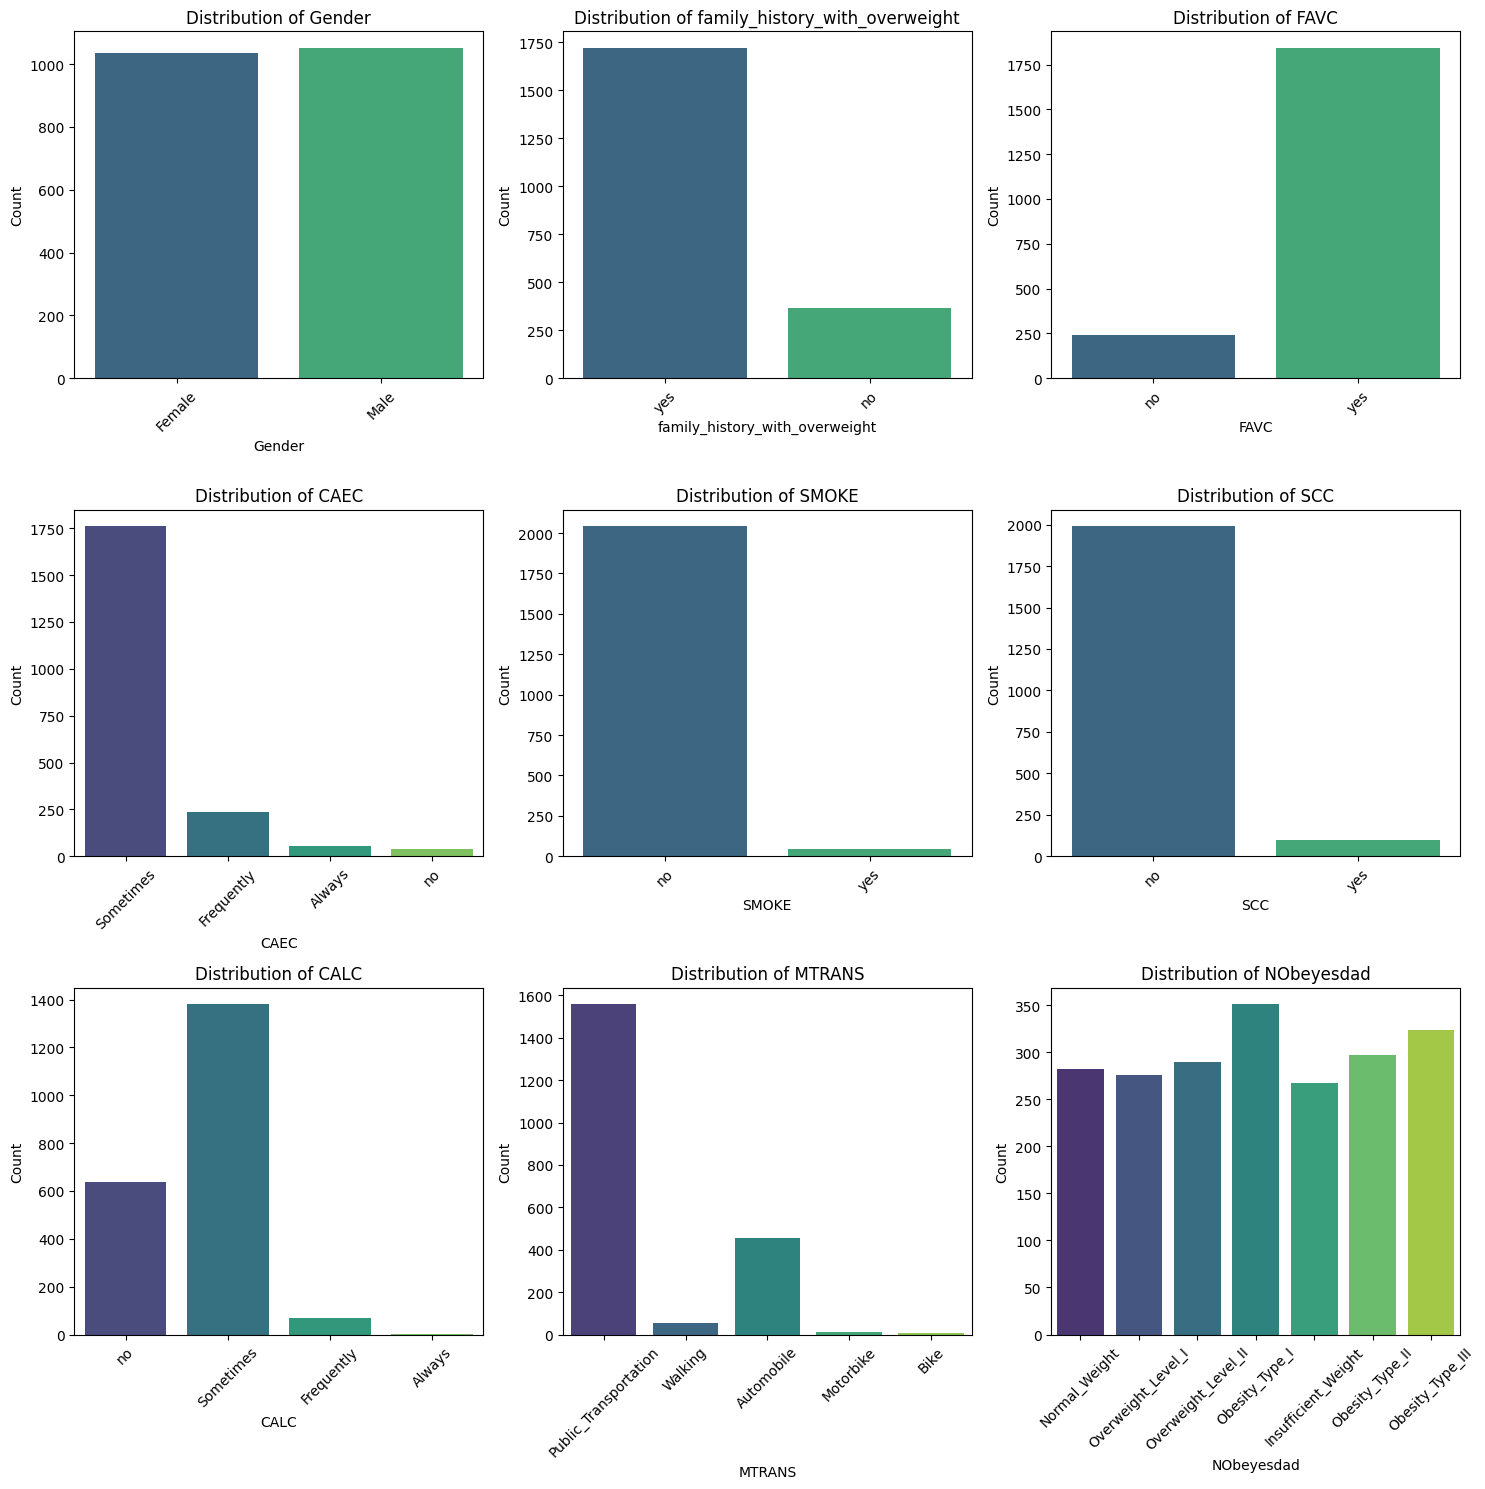

In [6]:

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Determine the number of rows needed for the subplots
num_rows = (len(categorical_cols) + 2) // 3  # Add 2 to round up to the nearest multiple of 3

# Create subplots with the determined number of rows
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

for i, col in enumerate(categorical_cols):
    unique_states = df[col].unique()
    num_states = len(unique_states)
    states_count = df[col].value_counts()

    # Display results in text format
    text_result = f"\n{'='*30}\nColumn: {col}\n{'='*30}\nNumber of unique states: {num_states}\nStates and their counts:\n{states_count}"
    print(text_result)

    # Plot a bar chart for visual representation
    row_index, col_index = divmod(i, 3)
    sns.countplot(x=col, data=df, palette='viridis', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Distribution of {col}')
    axes[row_index, col_index].set_xlabel(col)
    axes[row_index, col_index].set_ylabel('Count')
    axes[row_index, col_index].tick_params(axis='x', rotation=45, labelrotation=45)  # Fix rotation

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


**Non Categorical Data:**-

**1. Text Explanation**:

Column Information:
Column Name: The name of the non-categorical (numerical) column being analyzed.

Summary Statistics: Descriptive statistics, including count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum.

**Minimum**:

The smallest value in the dataset.
It represents the floor or lower boundary of the dataset.


**25th Percentile (First Quartile)**:

The value below which 25% of the data falls.

It is the first quartile and is also known as the lower quartile.


**Median (50th Percentile or Second Quartile):**

The middle value in the dataset when it is sorted in ascending order.

It represents the point below which 50% of the data falls.

In a symmetrical distribution, the median is the same as the mean.


**75th Percentile (Third Quartile):**

The value below which 75% of the data falls.
It is the third quartile and is also known as the upper quartile.

  **2. Graphical Representation**:

Type of Diagram: Histogram with Kernel Density Estimate (KDE) (specifically, sns.histplot is used).

X-Axis: Represents the numerical values within the column.

Y-Axis: Represents the frequency or density of values.

Title: Indicates the distribution of the numerical variable.


Column: Age
Summary Statistics:
count    2087.000000
mean       24.353090
std         6.368801
min        14.000000
25%        19.915937
50%        22.847618
75%        26.000000
max        61.000000
Name: Age, dtype: float64 
Column: Height
Summary Statistics:
count    2087.000000
mean        1.702674
std         0.093186
min         1.450000
25%         1.630178
50%         1.701584
75%         1.769491
max         1.980000
Name: Height, dtype: float64 
Column: Weight
Summary Statistics:
count    2087.000000
mean       86.858730
std        26.190847
min        39.000000
25%        66.000000
50%        83.101100
75%       108.015907
max       173.000000
Name: Weight, dtype: float64 
Column: FCVC
Summary Statistics:
count    2087.000000
mean        2.421466
std         0.534737
min         1.000000
25%         2.000000
50%         2.396265
75%         3.000000
max         3.000000
Name: FCVC, dtype: float64 
Column: NCP
Summary Statistics:
count    2087.000000
mean        2.701179
std

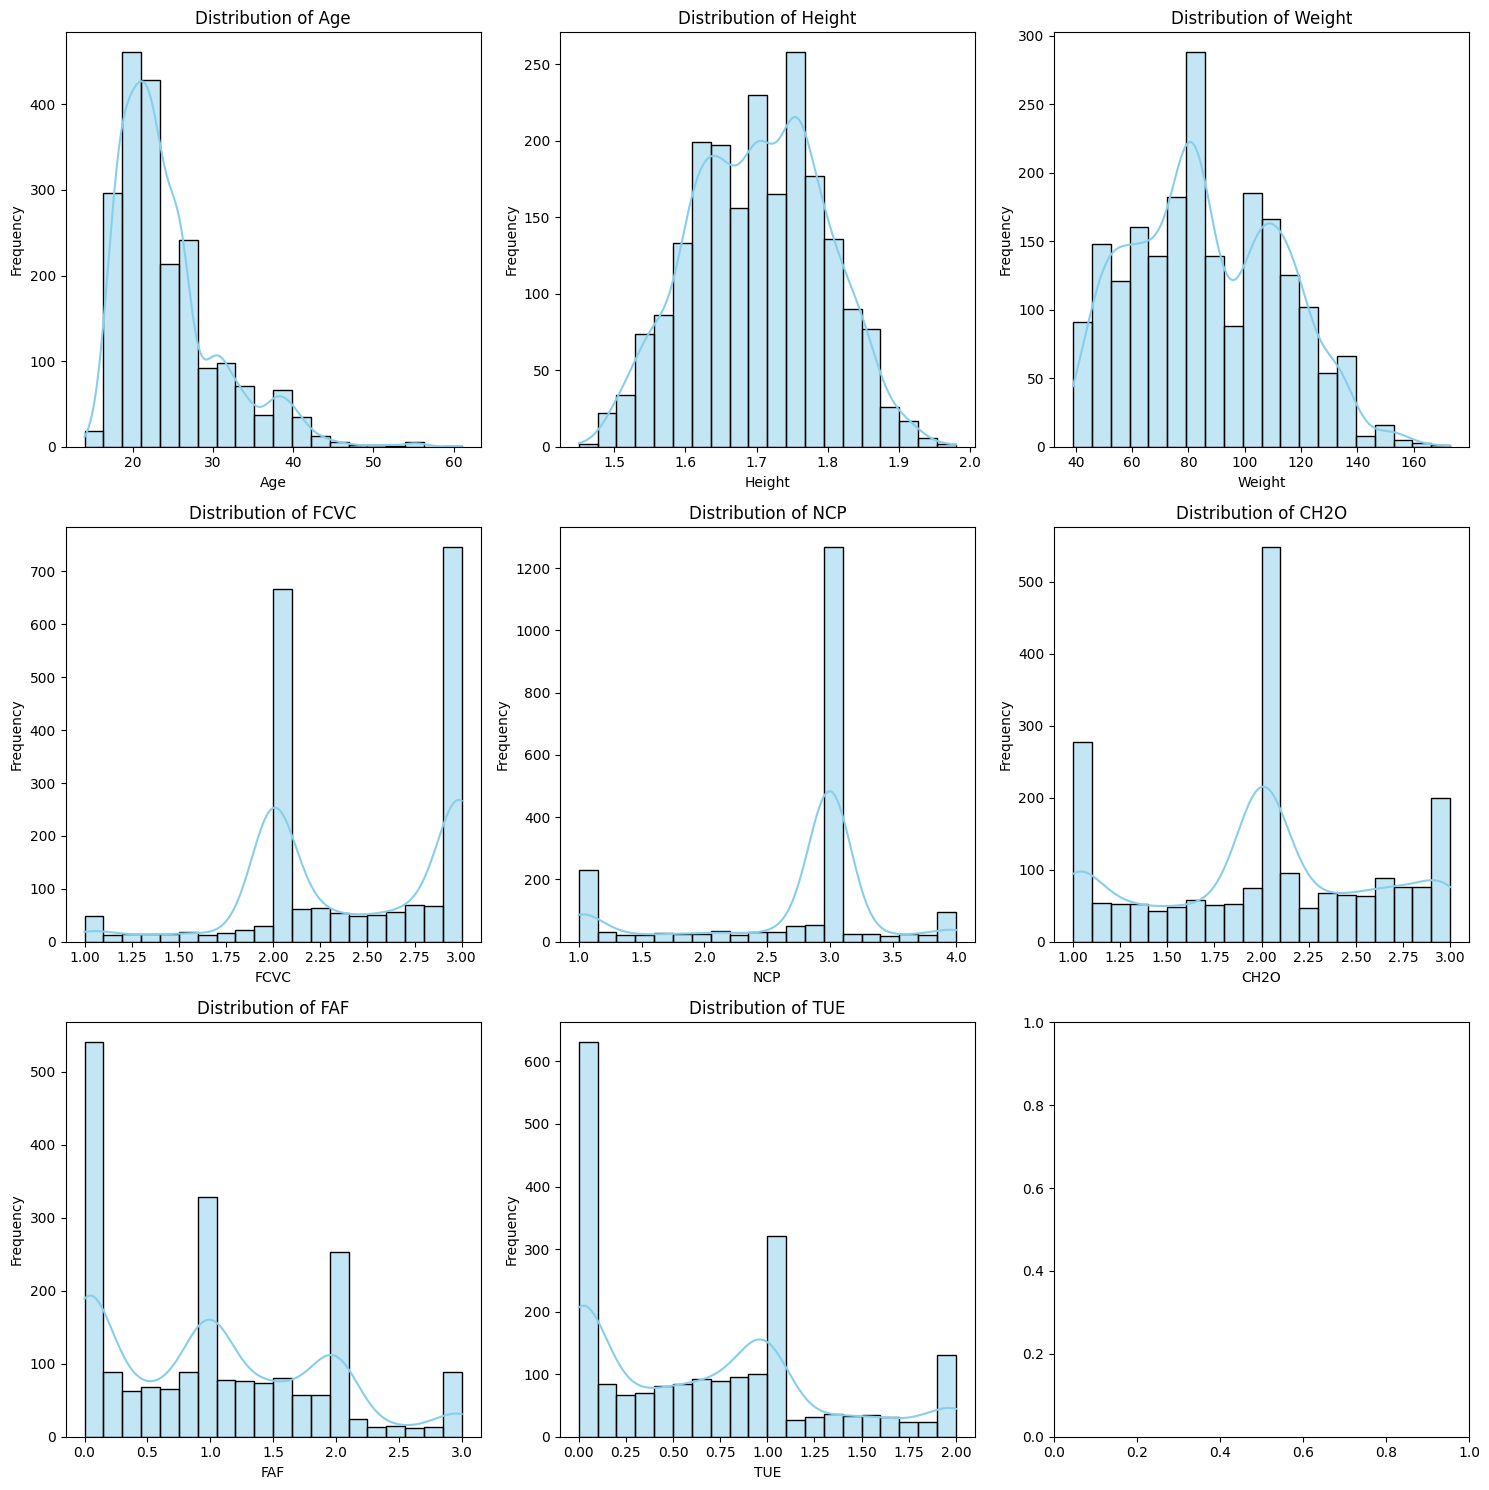

In [7]:
# Identify non-categorical columns (numerical)
numerical_cols = df.select_dtypes(include=['float64']).columns

# Determine the number of rows needed for the subplots
num_rows_numeric = (len(numerical_cols) + 2) // 3  # Add 2 to round up to the nearest multiple of 3

# Create subplots for non-categorical data
fig_numeric, axes_numeric = plt.subplots(nrows=num_rows_numeric, ncols=3, figsize=(15, 5 * num_rows_numeric))

# Initialize variables for tracking text results
text_results_numeric = []

for i, col in enumerate(numerical_cols):
    # Display results in text format
    text_result_numeric = f"\n{'='*30}\nColumn: {col}\n{'='*30}\n"
    text_result_numeric += f"Summary Statistics:\n{df[col].describe()}"
    text_results_numeric.append(text_result_numeric)
    #if not df[col].dropna().empty:
        # Plot a histogram for visual representation
    row_index, col_index = divmod(i, 3)
    sns.histplot(data=df, x=col, bins=20, kde=True, color='skyblue', ax=axes_numeric[row_index, col_index])
    axes_numeric[row_index, col_index].set_title(f'Distribution of {col}')
    axes_numeric[row_index, col_index].set_xlabel(col)
    axes_numeric[row_index, col_index].set_ylabel('Frequency')

# Display text results for non-categorical data
text_results_numeric_str = ' '.join(text_results_numeric)
print(text_results_numeric_str)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

**Transforming categorical variables into a suitable format for numerical computation.**

**Ordinal Categorical Variables:**
Ordinal variables are categorical variables with a natural order or ranking between the categories. The distances between the categories are not defined, but there is a clear order. Examples include education levels (e.g., high school, bachelor's, master's), economic status (e.g., low, medium, high), or customer satisfaction levels (e.g., low, medium, high).
For our dataset:

  1. Category of Obesity (NObesity)

  2. Consumption of food between meals (CAEC)

  3. Consumption of alcohol (CALC)



**Handling in Machine Learning:**

Ordinal variables are often encoded using label encoding, where each category is assigned a unique integer. The order of the integers reflects the order of the categories.
Algorithms: Many machine learning algorithms can handle ordinal variables well. Decision trees and ensemble methods (e.g., Random Forests) are particularly suitable as they can naturally split data based on ordinal features.


.

.


**Binary Variables:**
Binary variables take on only two possible values, often 0 and 1. These variables are a special case of categorical variables where there are only two categories. Examples include yes/no, true/false, or the presence/absence of a particular characteristic. For our dataset:
 ['Gender', 'family_history_with_overweight', 'FAVC', 'SCC', 'MTRANS', 'SMOKE']

  1. Gender
  2. family_history_with_overweight
  3. Frequent consumption of high caloric food (FAVC)
  4. Calories consumption monitoring (SCC)
  5. Transportation used (MTRANS) ---> a. Walking/ Public_Transportation/ Automobile/ Motorbike/ Bike

  6. SMOKE activity

**Handling in Machine Learning:**

One-Hot Encoding: While binary variables can be left as they are (0 or 1), they can also be one-hot encoded to represent them as two separate columns (e.g., presence = 1, absence = 0).
Algorithms: Binary variables are well-suited for algorithms that work with binary data. Logistic Regression, Support Vector Machines (SVM), and certain decision tree variants (e.g., CART) are commonly used for binary classification tasks.

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Separate the data into numerical, non-ordinal categorical, and ordinal categorical columns
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
non_ordinal_categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SCC', 'MTRANS', 'SMOKE']
ordinal_categorical_col = ['CAEC', 'CALC','NObeyesdad']

# Separate the dataset into features (X) and target variable (y)
X = df[numerical_cols + non_ordinal_categorical_cols + ordinal_categorical_col]
y = df['NObeyesdad']

# One-Hot Encoding for non-ordinal categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
non_ordinal_categorical_encoded = encoder.fit_transform(X[non_ordinal_categorical_cols])

# Create a DataFrame for the One-Hot Encoded non-ordinal categorical columns
non_ordinal_categorical_encoded_df = pd.DataFrame(non_ordinal_categorical_encoded, columns=encoder.get_feature_names_out(non_ordinal_categorical_cols))

# Label Encoding for ordinal categorical columns
label_encoder = LabelEncoder()
for col in ordinal_categorical_col:
    X[col] = label_encoder.fit_transform(X[col])

# Concatenate the numerical columns, One-Hot Encoded non-ordinal categorical columns, and ordinal categorical columns
X_normalized_ctgric = pd.concat([X[numerical_cols], non_ordinal_categorical_encoded_df, X[ordinal_categorical_col]], axis=1)

# Display the normalized data
# print(X_normalized.head())
X_normalized_ctgric

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,SMOKE_yes,CAEC,CALC,NObeyesdad
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,3,1
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2,2,1
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1,1
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1,5
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,4
2083,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,4
2084,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,4
2085,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,4


**Normalizing numerical Data**

In the previous section Categorical data have been modified and in this section the Z_score and Min_Max methods have been used for normalizing numerical parameters.

**Z-Score Normalization (Standardization):**


**['Age', 'Weight']**

Pros:

Retains the shape of the original distribution.
Sensitive to outliers, but doesn't overly amplify their impact.


Cons:

The resulting values may not be in a specific range.


**Min-Max Normalization (Scaling):**


**['Height','Number of main meals (NCP)','Consumption of water daily (CH20)', 'Physical activity frequency (FAF)','Time using technology devices (TUE)']**


Pros:

Scales the data to a specific range (commonly [0, 1]).

Simple and intuitive.
        
        
Cons:
Sensitive to outliers, as extreme values can heavily influence the scaling.


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numerical_columns = X_normalized_ctgric.select_dtypes(include=['float64', 'int64']).columns
# z_score_columns =[]
# Separate columns based on normalization method
z_score_columns = ['Age', 'Weight']
#z_score_columns = ['Age']
exempt_catgr_data=['CAEC', 'CALC','NObeyesdad','Gender', 'family_history_with_overweight','Gender_Male', 'family_history_with_overweight_yes','SCC_yes','FAVC_yes', 'FAVC', 'SCC', 'MTRANS', 'SMOKE','MTRANS_Bike','MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking']
min_max_columns = [col for col in numerical_columns if col not in z_score_columns if col not in exempt_catgr_data]

# Create a new DataFrame for normalized data
Normalized_df = X_normalized_ctgric.copy()

# Apply Z-score normalization to selected columns
scaler = StandardScaler()
if z_score_columns:
  Normalized_df[z_score_columns] = scaler.fit_transform(X_normalized_ctgric[z_score_columns])

# Apply Min-Max normalization to selected columns
min_max_scaler = MinMaxScaler()
Normalized_df[min_max_columns] = min_max_scaler.fit_transform(X_normalized_ctgric[min_max_columns])

# Print or use the Normalized_df DataFrame as needed
Normalized_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,SMOKE_yes,CAEC,CALC,NObeyesdad
0,-0.526613,0.320755,-0.872985,0.5,0.666667,0.500000,0.000000,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,3,1
1,-0.526613,0.132075,-1.178508,1.0,0.666667,1.000000,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2,2,1
2,-0.212507,0.660377,-0.376509,0.5,0.666667,0.500000,0.666667,0.500000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1,1
3,0.415705,0.660377,0.005395,1.0,0.666667,0.500000,0.666667,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1,5
4,-0.369560,0.622642,0.112328,0.5,0.000000,0.500000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,-0.530250,0.491943,1.701376,1.0,0.666667,0.364070,0.558756,0.453124,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,4
2083,-0.372239,0.563366,1.790528,1.0,0.666667,0.502565,0.447130,0.299635,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,4
2084,-0.287258,0.570200,1.788482,1.0,0.666667,0.527097,0.471403,0.323144,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,4
2085,0.001389,0.546132,1.775393,1.0,0.666667,0.926170,0.379702,0.293017,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,4


This section help us to follow the learning process by selecting the different dataset.

1. df:                          whithout normalization (only data cleaning)

2. X_normalized_ctgric:         Transforming categorical variables into a suitable format for numerical computation.

3. Normalized_df:               all numerical data have been normalized

In [10]:
X_normalized= Normalized_df            # all numerical data have been normalized and categorical data have been converted
# X_normalized= X_normalized_ctgric    # only categorical data have been converted
#X_normalized=df                      # whithout normalization

# separation Inputs and output
X=X_normalized.iloc[:,:-1]       # all Inputs
Y=X_normalized.iloc[:,-1]        # output
X
# y

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,SMOKE_yes,CAEC,CALC
0,-0.526613,0.320755,-0.872985,0.5,0.666667,0.500000,0.000000,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,3
1,-0.526613,0.132075,-1.178508,1.0,0.666667,1.000000,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2,2
2,-0.212507,0.660377,-0.376509,0.5,0.666667,0.500000,0.666667,0.500000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1
3,0.415705,0.660377,0.005395,1.0,0.666667,0.500000,0.666667,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1
4,-0.369560,0.622642,0.112328,0.5,0.000000,0.500000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,-0.530250,0.491943,1.701376,1.0,0.666667,0.364070,0.558756,0.453124,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2
2083,-0.372239,0.563366,1.790528,1.0,0.666667,0.502565,0.447130,0.299635,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2
2084,-0.287258,0.570200,1.788482,1.0,0.666667,0.527097,0.471403,0.323144,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2
2085,0.001389,0.546132,1.775393,1.0,0.666667,0.926170,0.379702,0.293017,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2


**Before and after of Normalizing**

Graphically show the initial and modified dataset by using different plots.

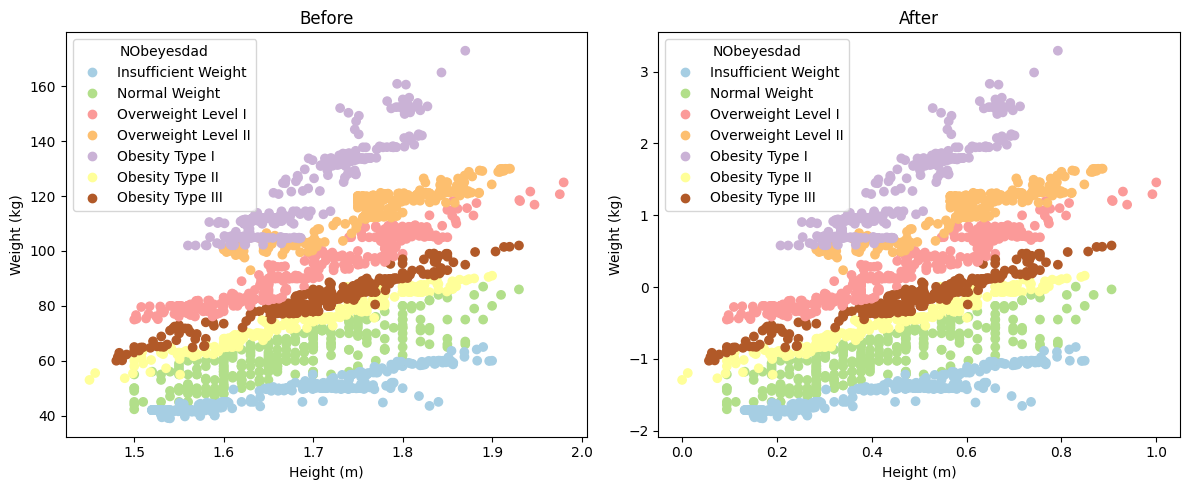

In [11]:


# Assuming X and df are your dataframes, and 'NObeyesdad' is a column in df
categories = ['Insufficient Weight', 'Normal Weight', 'Overweight Level I', 'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III']

# Create a subplot grid with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the right side
scatter_plot_right = axs[1].scatter(x=X['Height'], y=X['Weight'], c=df['NObeyesdad'].astype('category').cat.codes, cmap='Paired')
legend_right = axs[1].legend(handles=scatter_plot_right.legend_elements()[0], title='NObeyesdad', labels=categories)
axs[1].set_xlabel('Height (m)')
axs[1].set_ylabel('Weight (kg)')
axs[1].set_title('After')

# Plot for the left side
scatter_plot_left = axs[0].scatter(x=df_initial['Height'], y=df_initial['Weight'], c=df_initial['NObeyesdad'].astype('category').cat.codes, cmap='Paired')
legend_left = axs[0].legend(handles=scatter_plot_left.legend_elements()[0], title='NObeyesdad', labels=categories)
axs[0].set_xlabel('Height (m)')
axs[0].set_ylabel('Weight (kg)')
axs[0].set_title('Before')

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

# Display the plots
plt.show()


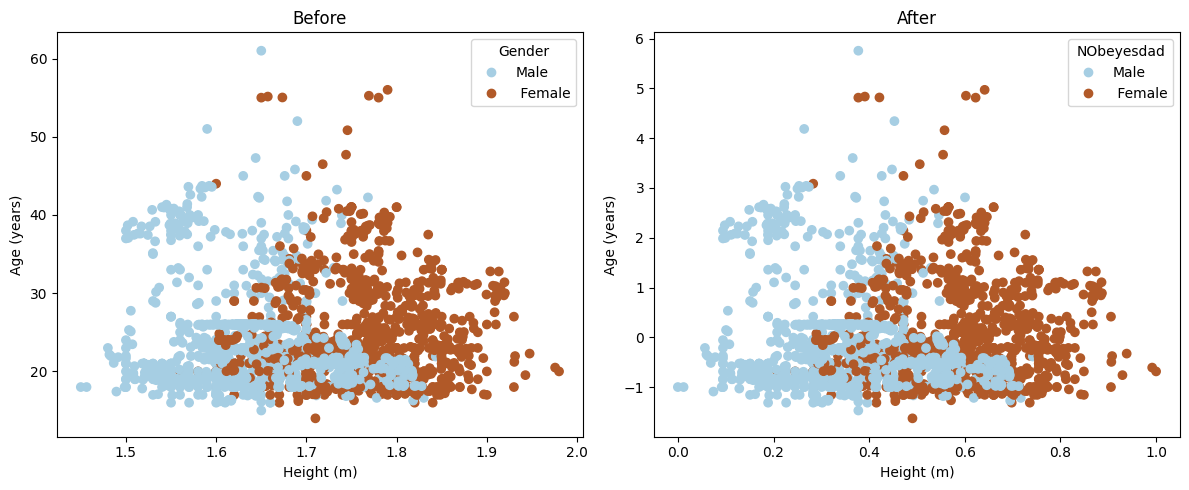

In [12]:


# Assuming X and df are your dataframes, and 'NObeyesdad' is a column in df
categories = ['Male', ' Female']

# Create a subplot grid with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the right side
scatter_plot_right = axs[1].scatter(x=X['Height'], y=X['Age'], c=df['Gender'].astype('category').cat.codes, cmap='Paired')
legend_right = axs[1].legend(handles=scatter_plot_right.legend_elements()[0], title='NObeyesdad', labels=categories)
axs[1].set_xlabel('Height (m)')
axs[1].set_ylabel('Age (years)')
axs[1].set_title('After')

# Plot for the left side
scatter_plot_left = axs[0].scatter(x=df_initial['Height'], y=df_initial['Age'], c=df_initial['Gender'].astype('category').cat.codes, cmap='Paired')
legend_left = axs[0].legend(handles=scatter_plot_left.legend_elements()[0], title='Gender', labels=categories)
axs[0].set_xlabel('Height (m)')
axs[0].set_ylabel('Age (years)')
axs[0].set_title('Before')

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

# Display the plots
plt.show()




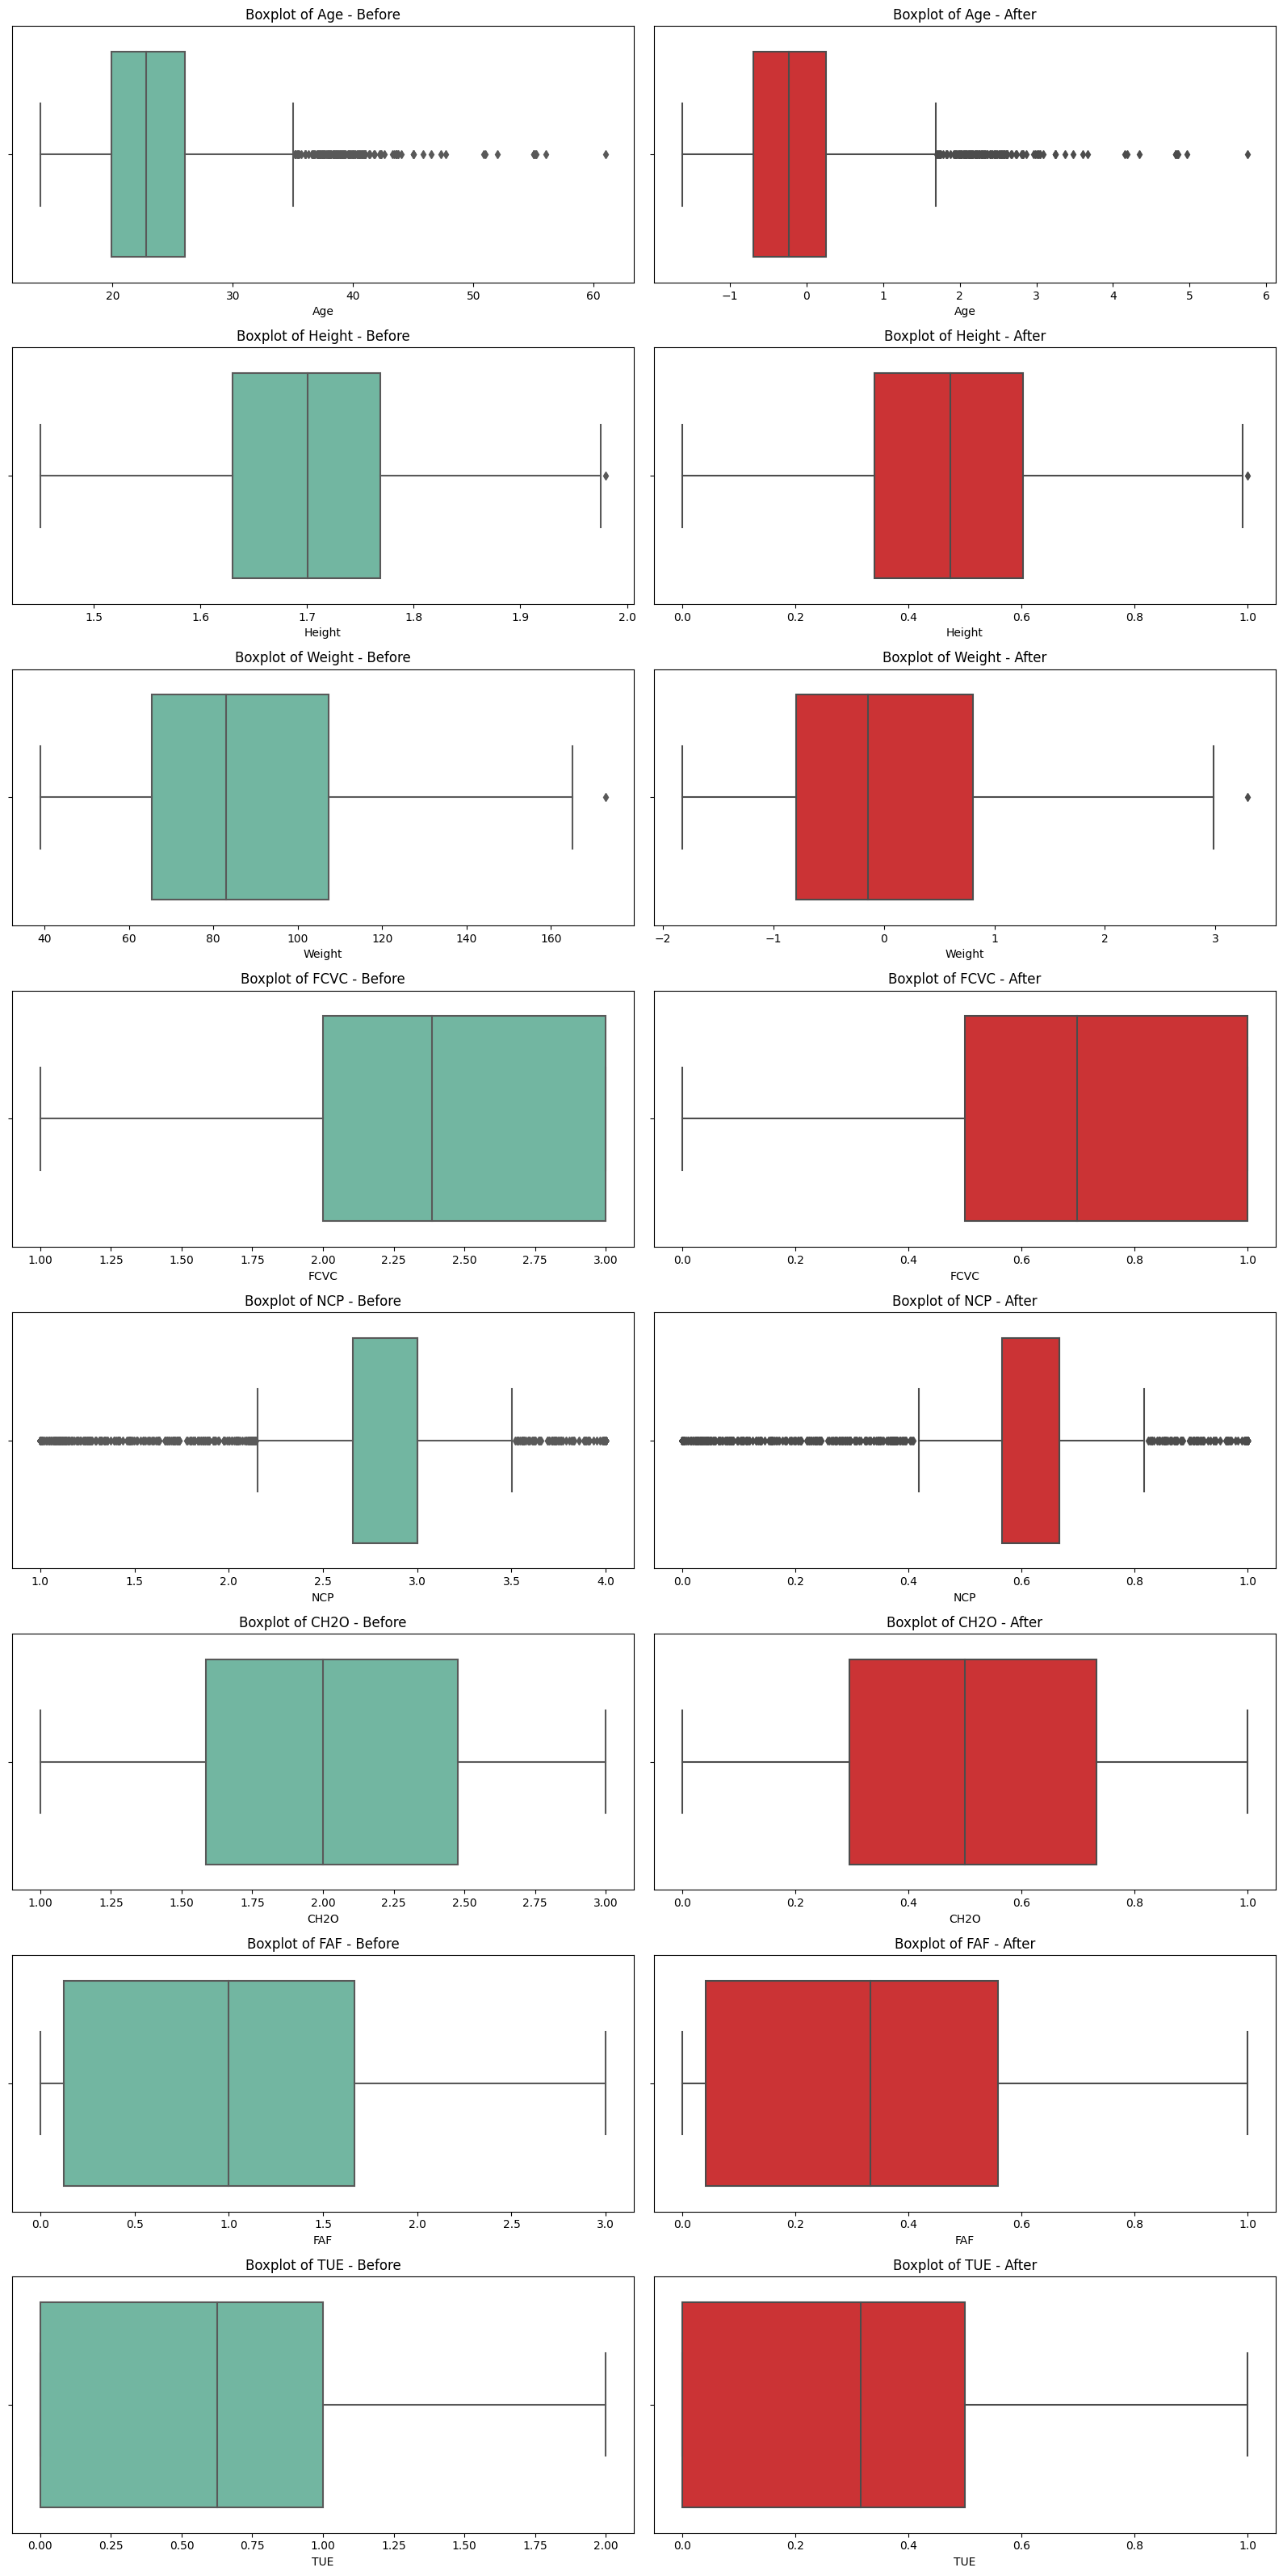

In [13]:
left_palette = 'Set2'
right_palette = 'Set1'

# First set of box plots
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
num_plots = len(numerical_columns)
num_cols = min(num_plots, 2)
num_rows = -(-num_plots // num_cols) * 2  # Twice the number of rows for each variable

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4 * num_rows))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_initial[column], ax=axes[i * 2], palette=left_palette)
    axes[i * 2].set_title(f'Boxplot of {column} - Before')

    sns.boxplot(x=X[column], ax=axes[i * 2 + 1], palette=right_palette)
    axes[i * 2 + 1].set_title(f'Boxplot of {column} - After')

for j in range(num_plots * 2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

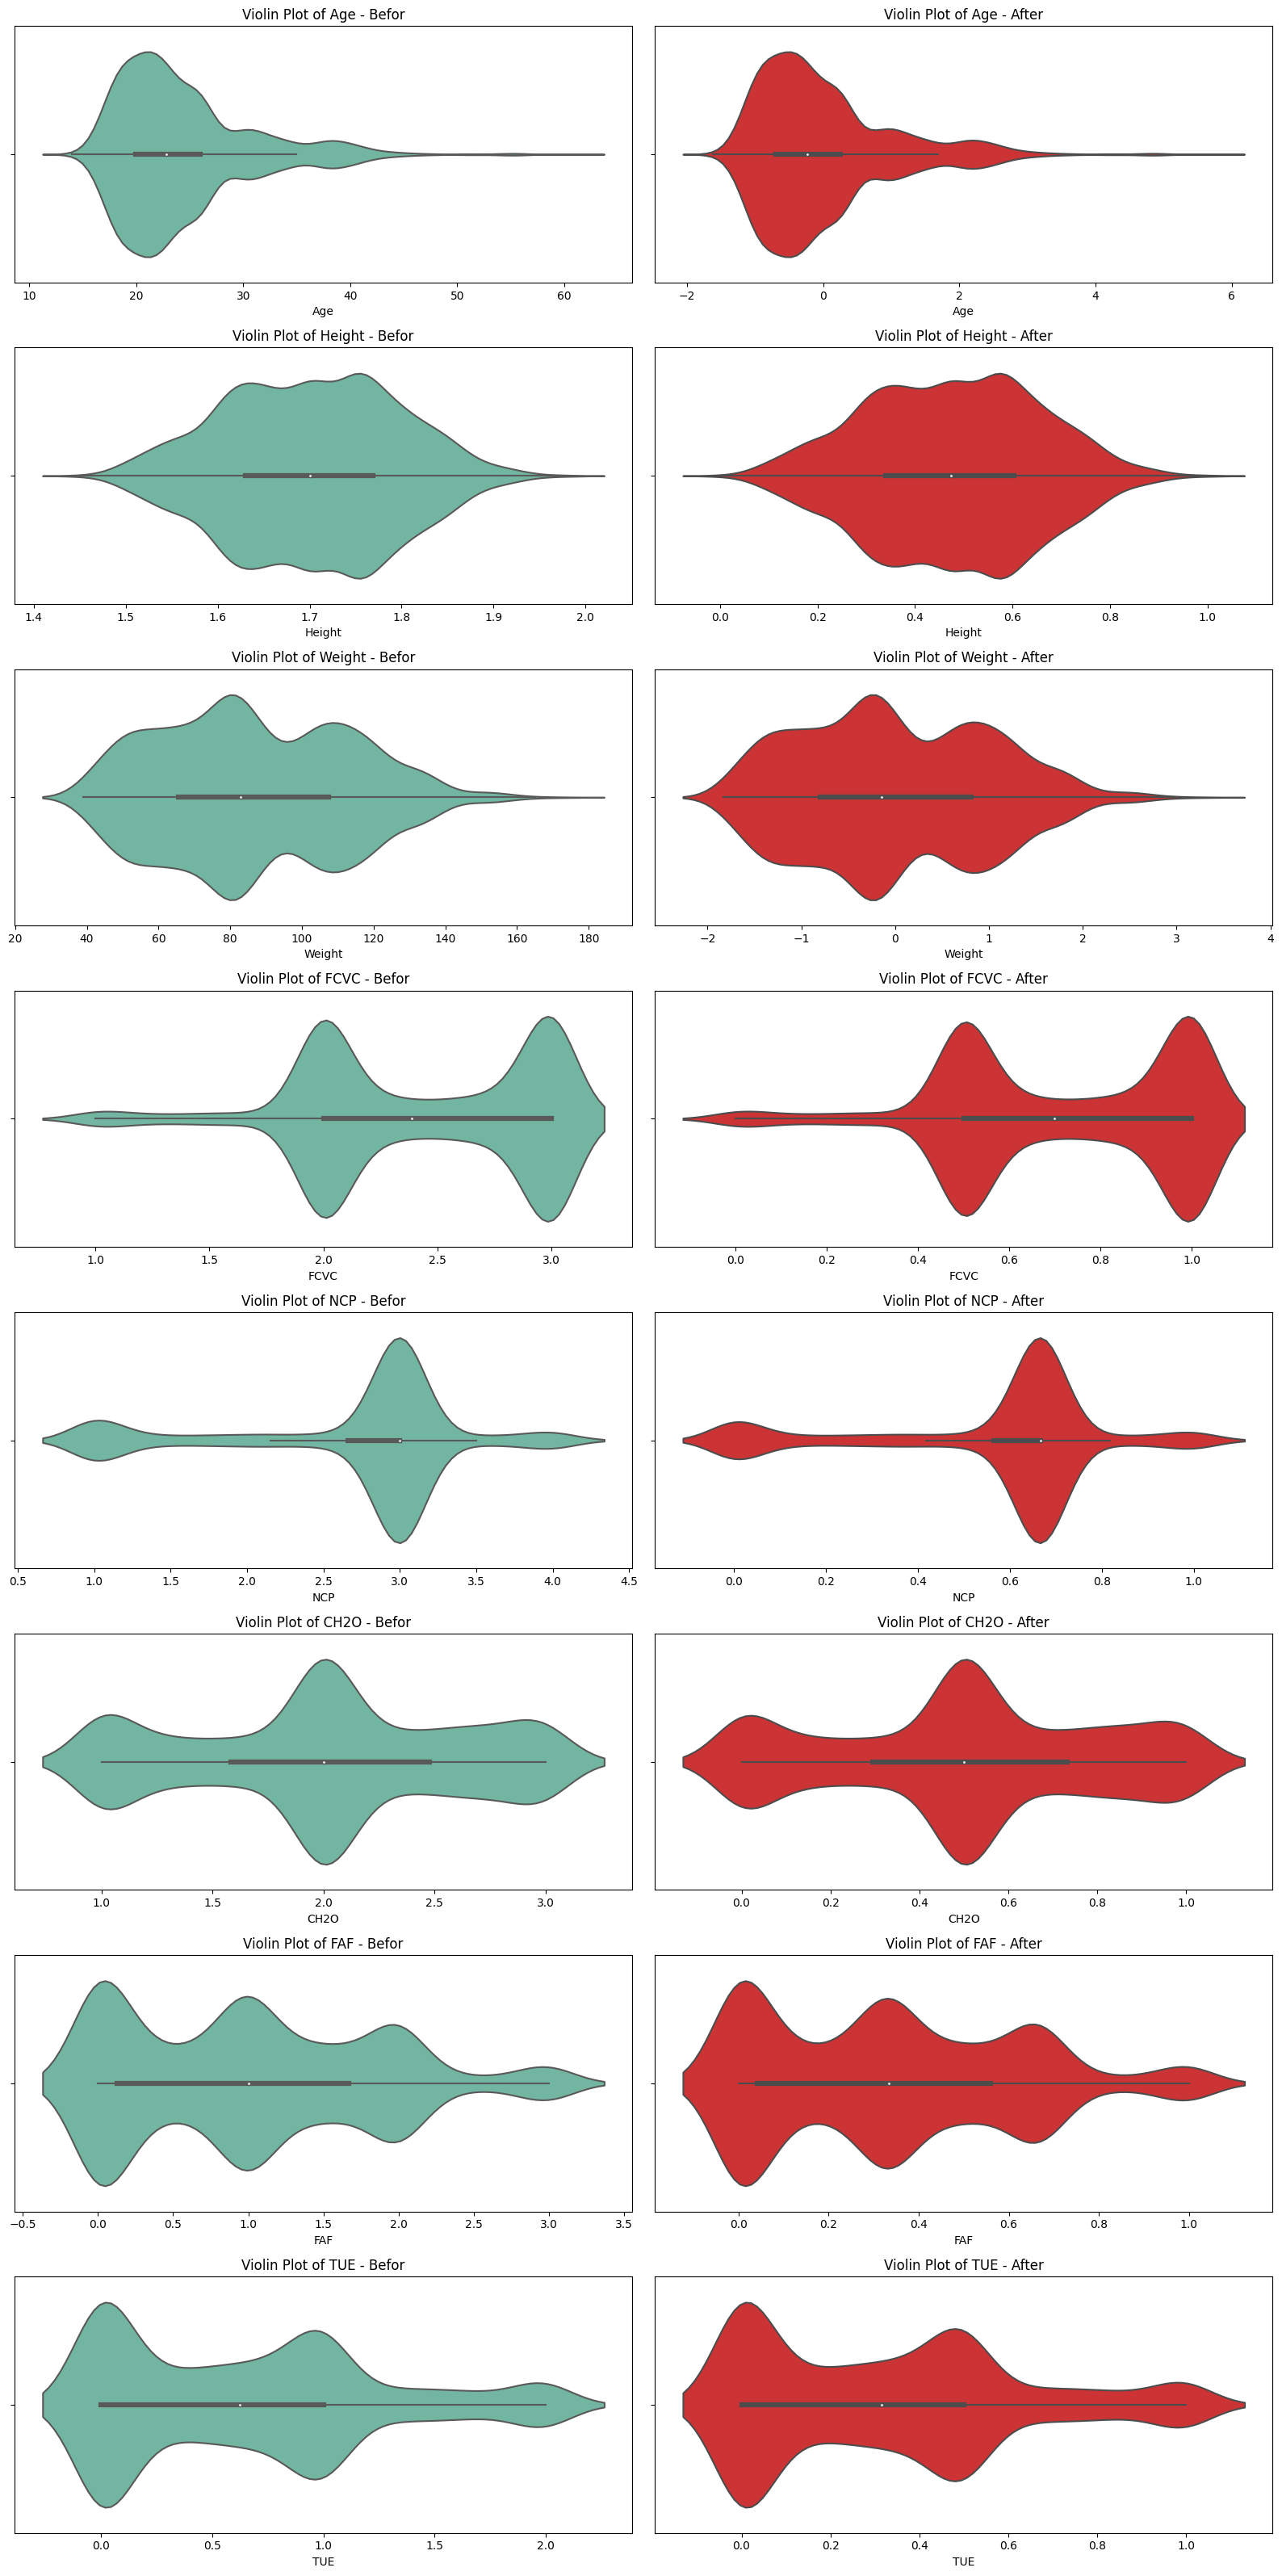

In [14]:
# Set custom colors for the left and right violin plots
left_palette = 'Set2'
right_palette = 'Set1'

# First set of violin plots
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
num_plots = len(numerical_columns)
num_cols = min(num_plots, 2)
num_rows = -(-num_plots // num_cols) * 2  # Twice the number of rows for each variable

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4 * num_rows))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.violinplot(x=df_initial[column], ax=axes[i * 2], palette=left_palette)
    axes[i * 2].set_title(f'Violin Plot of {column} - Befor')

    sns.violinplot(x=X[column], ax=axes[i * 2 + 1], palette=right_palette)
    axes[i * 2 + 1].set_title(f'Violin Plot of {column} - After')

for j in range(num_plots * 2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Performing Principal Component Analysis (PCA)**

**Goal:**

PCA (Principal Component Analysis) aims to simplify complex data by finding a new set of features, called principal components, that capture the most important information.


**High-Dimensional Data:**

Imagine you have data with many features (dimensions). PCA helps reduce this high-dimensional data to a smaller number of dimensions while retaining as much relevant information as possible.


**Variance Matters:**

PCA looks for directions in the data where the variance (spread) is maximum. These directions are the principal components.


**Eigenvalues and Eigenvectors:**

PCA uses math concepts called eigenvalues and eigenvectors to find these principal components. Eigenvalues represent the amount of variance in each direction, and eigenvectors are the corresponding directions.

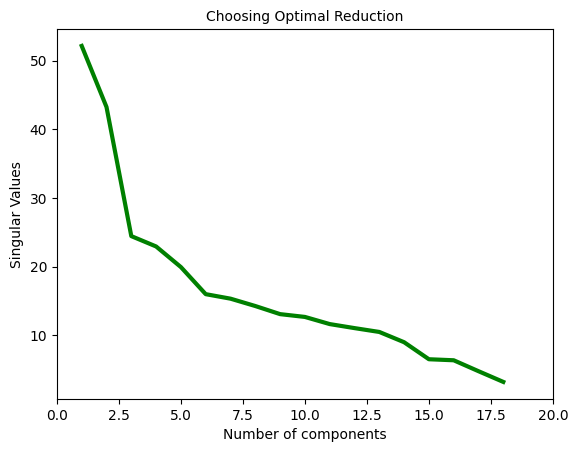

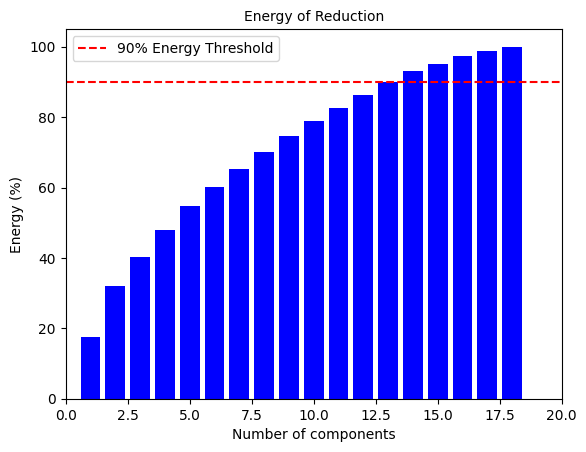

In [15]:
from sklearn.decomposition import PCA

# List to store singular values for each number of components
List_pca = []

# Loop through different numbers of components
for i in range(19):
    # Fit PCA model with the current number of components
    pca = PCA(n_components=i).fit(X)

    # Store the singular values in the list
    lambda_ = pca.singular_values_
    List_pca.append(pca.singular_values_)

# Generate x-axis values for the plot
Xplt = np.arange(1, 19)

# Plot singular values against the number of components
plt.plot(Xplt, lambda_, linewidth=3, color='g')
plt.xlabel("Number of components", fontsize=10)
plt.ylabel("Singular Values", fontsize=10)
plt.title("Choosing Optimal Reduction", fontsize=10)
plt.xlim(0, 20)
plt.show()

# Calculate cumulative sum of singular values to represent energy
lambda_sum = []
a = 0
for i in range(len(lambda_)):
    a += lambda_[i]
    lambda_sum.append(a)

# Calculate the percentage of energy explained by each number of components
filter1 = (lambda_sum / lambda_sum[-1]) * 100
Energy = np.array([filter1]).reshape(18,)

# Print and plot the energy of PCA
# print("Energy of PCA:", Energy)

# Plot a bar diagram for the energy of each number of components
plt.bar(Xplt, Energy, color='blue')
plt.xlabel("Number of components", fontsize=10)
plt.ylabel("Energy (%)", fontsize=10)
plt.xlim(0, 20)
plt.title("Energy of Reduction", fontsize=10)

# Highlight the area where energy is more than 90%
plt.axhline(y=90, color='red', linestyle='--', label='90% Energy Threshold')
plt.legend()
plt.show()


**Choosing Optimal Reduction:**

   The first plot, titled "Choosing Optimal Reduction," displays the singular values of the principal components against the number of components. Singular values represent the amount of variance captured by each principal component. In PCA, these singular values are also called the eigenvalues.

    
  **Interpretation**:

  The higher the singular value, the more variance the corresponding principal component captures.
        By looking at the plot, you can observe the rate at which the singular values decrease. The point where the values start to level off or become very small is a potential indicator of the optimal number of components.
        A significant drop in singular values may suggest that adding more components doesn't provide much additional information.

**Selection Criteria:**

  Choose the number of components at the "elbow" or the point where the rate of decrease in singular values slows down.

    
**Energy of Reduction:**

    
The second plot, titled "Energy of Reduction," represents the cumulative energy (variance) captured by the principal components.


**Interpretation:**

Each bar in the plot represents the cumulative sum of singular values up to a certain number of components.
The height of the bar at a specific number of components indicates the percentage of total variance explained by those components.
The cumulative sum essentially tells you how much of the total variance in the data is retained as you increase the number of components.


**Selection Criteria:**

We can use a threshold, such as 90%, to decide how much energy (variance) you want to retain.
The point where the bar crosses the threshold line (e.g., 90%) can be considered a good choice for the number of components to retain.


**Putting it Together:**

Ideally, we want to find a balance where we retain enough information to describe the data well while reducing dimensionality.
Consider both plots together. A common approach is to choose the number of components at the elbow in the "Choosing Optimal Reduction" plot, and then verify that it retains a sufficient amount of energy in the "Energy of Reduction" plot.


By examining these plots, we can make an informed decision about the number of principal components to retain in your PCA analysis.

In the following section, we can determine the number of components for reducing the dataset based on the PCA analysis results. The reduced dataset will then be saved for future use in comparing results.

In [16]:

# Decision on the number of components based on the analysis
n_components=12
# Perform PCA with the chosen number of components
Main_pca = PCA(n_components).fit(X)
Xreduc = Main_pca.transform(X)
Xreduc=pd.DataFrame(Xreduc)
# X=Xreduc

# **Unsupervised learning algorithm**

Using clustering algorithms (MiniBatchKMeans and AgglomerativeClustering) for unsupervised learning and evaluating their performance using the silhouette score and a confusion matrix.


**Features of the Code:**

**Cross-Validation: **
The code uses k-fold cross-validation (KFold) with 5 splits.


**Clustering Models:** Two clustering models are used: MiniBatchKMeans with 7 clusters. AgglomerativeClustering with 7 clusters. These models are trained on the training data and used to predict cluster assignments for the test data.

**Evaluation Metrics:**
        The silhouette score is calculated for each model, providing a measure of how well-separated the clusters are. Higher silhouette scores indicate better-defined clusters.
        Confusion matrices are used to visualize the performance of the best-performing model.

**Visualization:**
        Bar plots show the average silhouette scores for each model.
        A confusion matrix is plotted for the best-performing model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

Average Silhouette Score for MiniBatchKMeans: 0.1854

Average Silhouette Score for Agglomerative: 0.1875



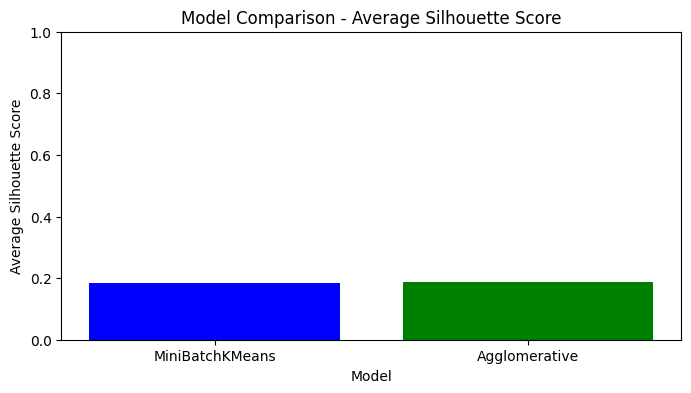

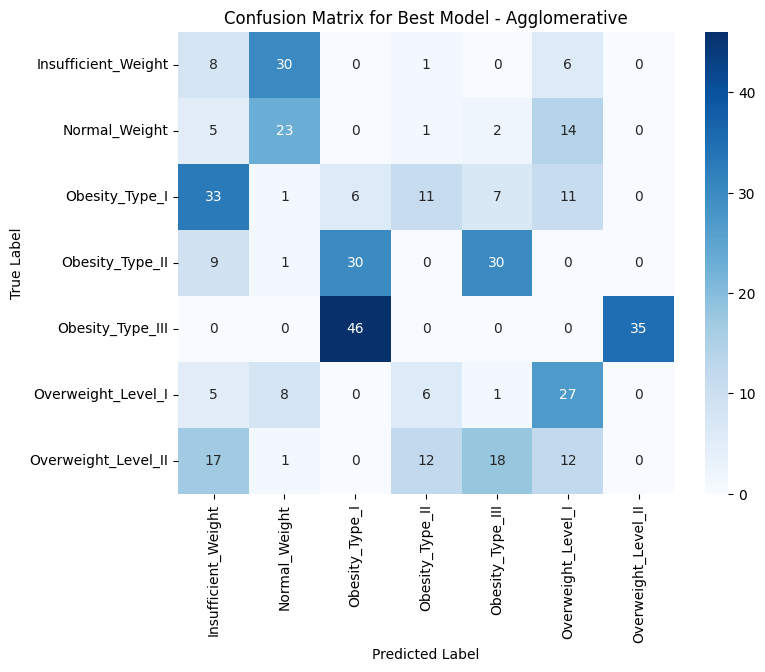

In [17]:
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
X_input = X
Y_encoded = Y

# Number of folds for cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize clustering models
kmeans_model = MiniBatchKMeans(n_clusters=7, random_state=42)  # Adjust the number of clusters
agglomerative_model = AgglomerativeClustering(n_clusters=7)

models = [kmeans_model, agglomerative_model]  # Add more models as needed
model_names = ['MiniBatchKMeans', 'Agglomerative']  # Add corresponding model names

# Lists to store results for each model
silhouette_scores = []
cluster_assignments = []

# Bar plots for each model's silhouette score across folds
for model, model_name in zip(models, model_names):
    fold_silhouette_scores = []
    fold_cluster_assignments = []

    for train_index, test_index in kf.split(X_input):
        X_train, X_test = X_input.iloc[train_index], X_input.iloc[test_index]

        # Fit the model
        model.fit(X_train)

        # Predict cluster assignments
        predictions = model.fit_predict(X_test)

        # Calculate silhouette score
        silhouette = silhouette_score(X_test, predictions)
        fold_silhouette_scores.append(silhouette)

        # Store cluster assignments
        fold_cluster_assignments.append(predictions)

    # Store the cluster assignments to the list
    cluster_assignments.append(fold_cluster_assignments)

    # Print average silhouette score for the model
    avg_silhouette = np.mean(fold_silhouette_scores)
    silhouette_scores.append(avg_silhouette)
    print(f"Average Silhouette Score for {model_name}: {avg_silhouette:.4f}\n")

# Plot bar plot for the average silhouette score of each model
plt.figure(figsize=(8, 4))
plt.bar(model_names, silhouette_scores, color=['blue', 'green'])  # Adjust colors accordingly
plt.title('Model Comparison - Average Silhouette Score')
plt.xlabel('Model')
plt.ylabel('Average Silhouette Score')
plt.ylim(0, 1)
plt.show()

# Find the best-performing model
best_model_index = np.argmax(silhouette_scores)
best_model_name = model_names[best_model_index]
best_cluster_assignments = cluster_assignments[best_model_index][-1]

# Plot confusion matrix for the best-performing model
plt.figure(figsize=(8, 6))
cm = confusion_matrix(Y_encoded[test_index], best_cluster_assignments)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix for Best Model - {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **K-Fold Cross-Validation:**   (Supervised learning algorithm)
        
Concept: K-Fold Cross-Validation is a technique used to assess the performance of a machine learning model. The dataset is split into 'k' folds, and the model is trained and tested 'k' times, each time using a different fold for testing and the remaining folds for training.
Usage in Code: The perform_kfold function implements K-Fold Cross-Validation, splitting the dataset into 'k' folds.

**Pipeline:**

Concept: A pipeline is used to streamline a lot of the routine processes, providing a simple way to keep everything organized. In the context of scikit-learn, a pipeline bundles preprocessing and modeling steps into a single object.
Usage in Code: The Pipeline class is used to create a pipeline for each classification model, including the classifier and, if applicable, preprocessing steps.


**GridSearchCV:**

Concept: GridSearchCV is a method for systematically working through multiple combinations of hyperparameter values, tuning them to find the best performance for a model.
Usage in Code: The GridSearchCV function is used to perform hyperparameter tuning for each model. It searches through the hyperparameter grid defined for each model and performs cross-validated grid search.


**Hyperparameter Tuning:**

Concept: Hyperparameters are parameters that are not learned from the data but set prior to the training process. Tuning these hyperparameters is crucial for improving model performance.
Usage in Code: Hyperparameter tuning is performed using GridSearchCV for the 'Logistic Regression' and 'Decision Tree' models. The hyperparameter grids (param_grids) define the range of values to search.


**Bar Plots with Matplotlib:**

Concept: Bar plots are used to visually represent the accuracy of each model on different folds or the average accuracy across folds.
Usage in Code: Matplotlib is used to create bar plots. Each bar represents the accuracy of a model on a specific fold, and comparisons are made between models.


**Model Evaluation - Accuracy:**

Concept: Accuracy is a common metric for classification problems, representing the ratio of correctly predicted instances to the total instances.
Usage in Code: The accuracy_score function from scikit-learn is used to evaluate the accuracy of the models.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

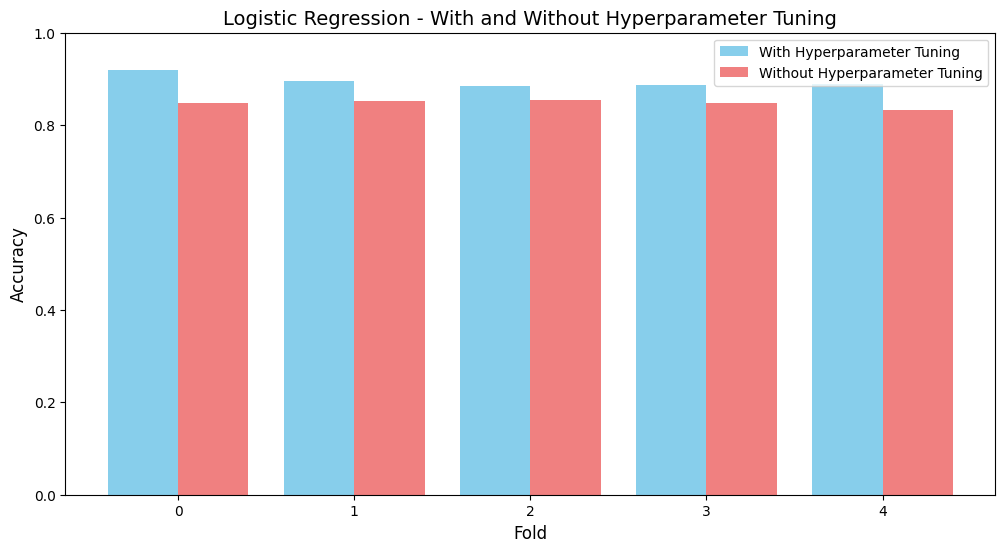

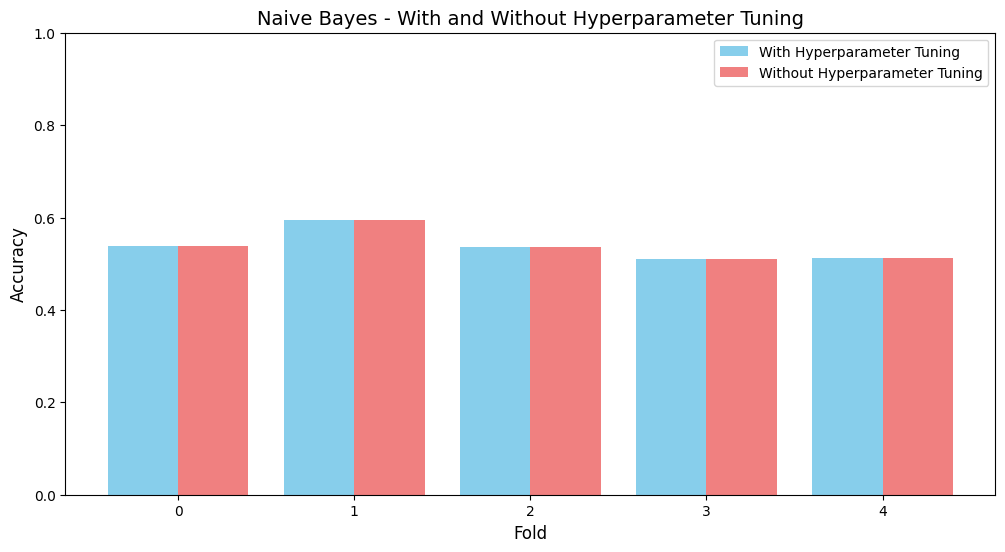

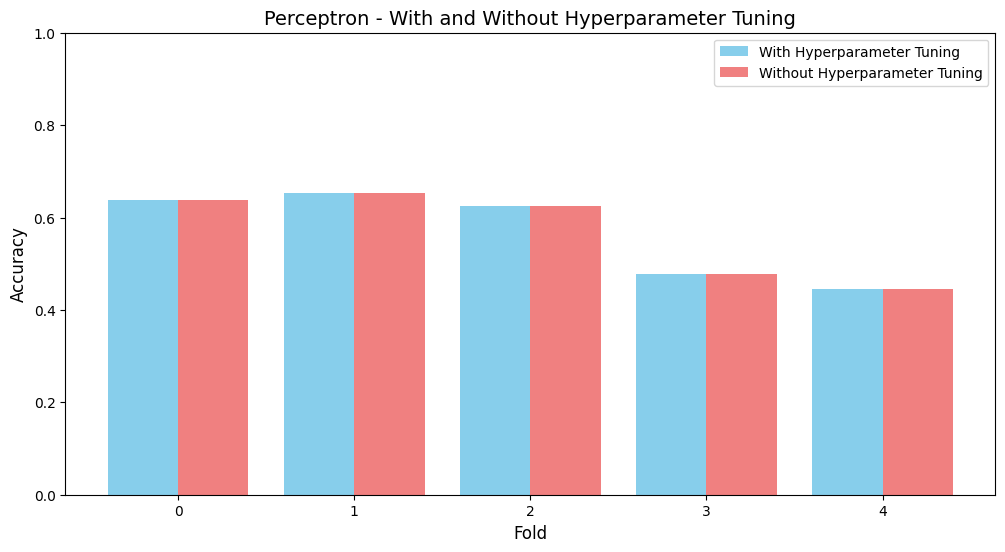

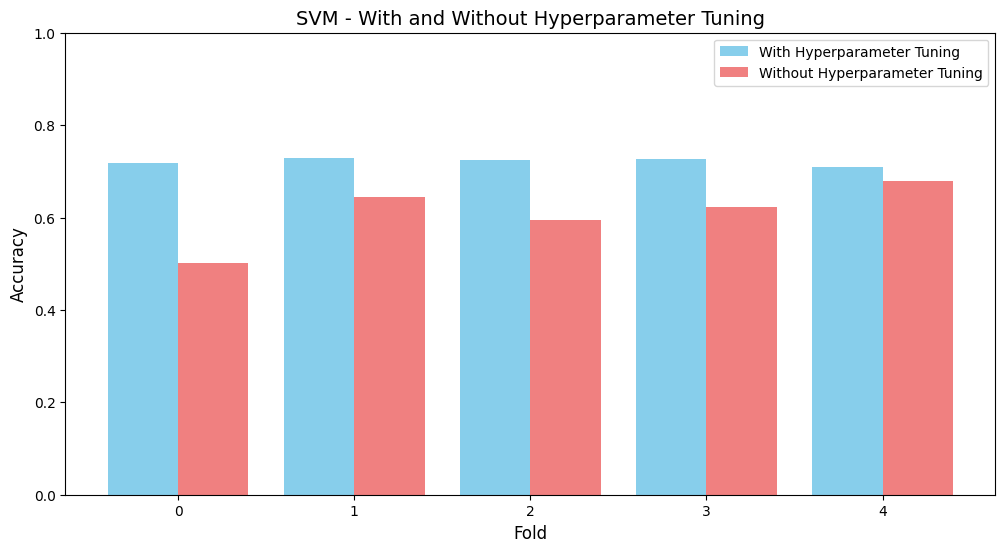

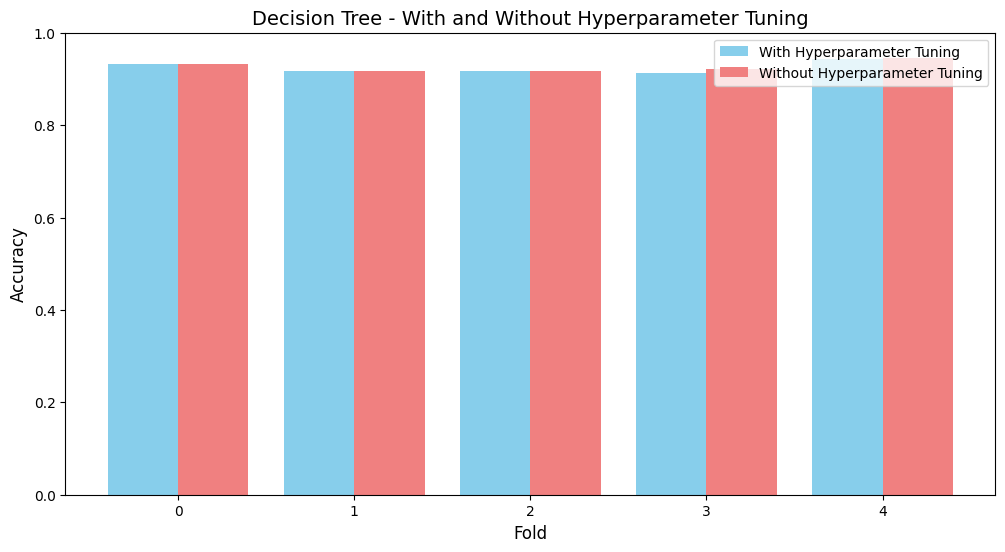

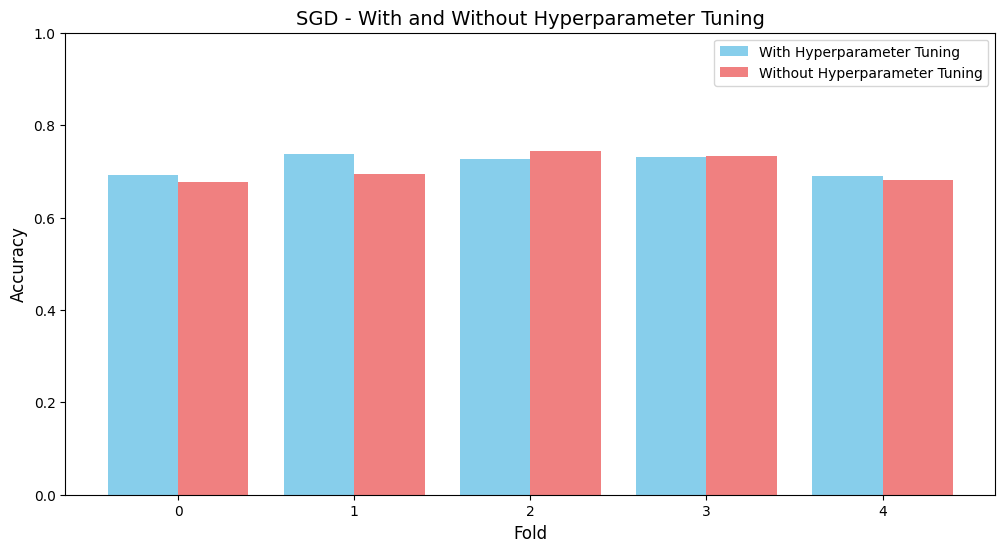


Logistic Regression:
  Best Accuracy: 0.92% using With Hyperparameter Tuning
  Best Hyperparameters: {'classifier__C': 1000}
  Confusion Matrix:
[[48  0  0  0  0  0  0]
 [ 6 37  0  0  0  7  0]
 [ 0  0 80  1  0  0  1]
 [ 0  0  0 57  0  0  0]
 [ 0  0  0  1 65  0  0]
 [ 0  6  0  0  0 53  4]
 [ 0  1  3  1  0  3 44]]


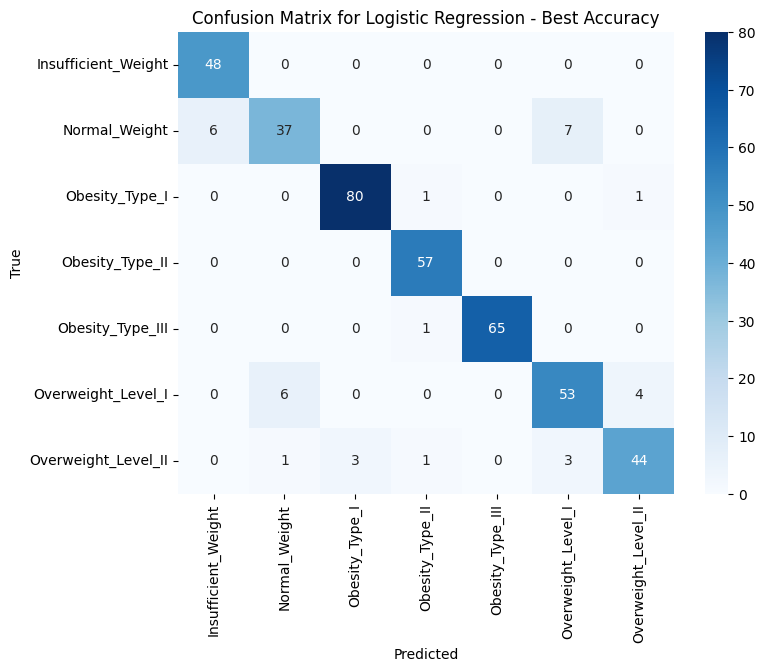


Naive Bayes:
  Best Accuracy: 0.60% using With Hyperparameter Tuning
  Best Hyperparameters: {}
  Confusion Matrix:
[[52  1  0  0  0  0  0]
 [37 10  2  0  0  1  2]
 [ 0  1 43 12  0  5  2]
 [ 0  0  2 54  0  0  0]
 [ 0  0  0  0 79  0  0]
 [27  1 24  1  0  5  1]
 [ 4  3 39  2  0  2  6]]


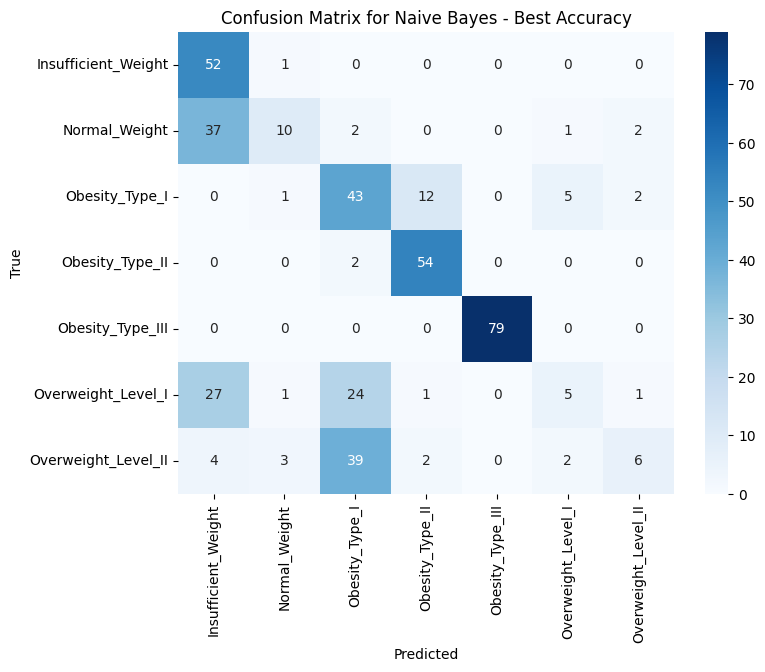


Perceptron:
  Best Accuracy: 0.65% using With Hyperparameter Tuning
  Best Hyperparameters: {}
  Confusion Matrix:
[[30  3  0  0  0 20  0]
 [ 1 25  2  0  0 21  3]
 [ 0  2 42  3  0 14  2]
 [ 0  0  9 45  0  2  0]
 [ 0  0  0  0 79  0  0]
 [ 0  4  4  0  0 50  1]
 [ 0  5 15  0  0 34  2]]


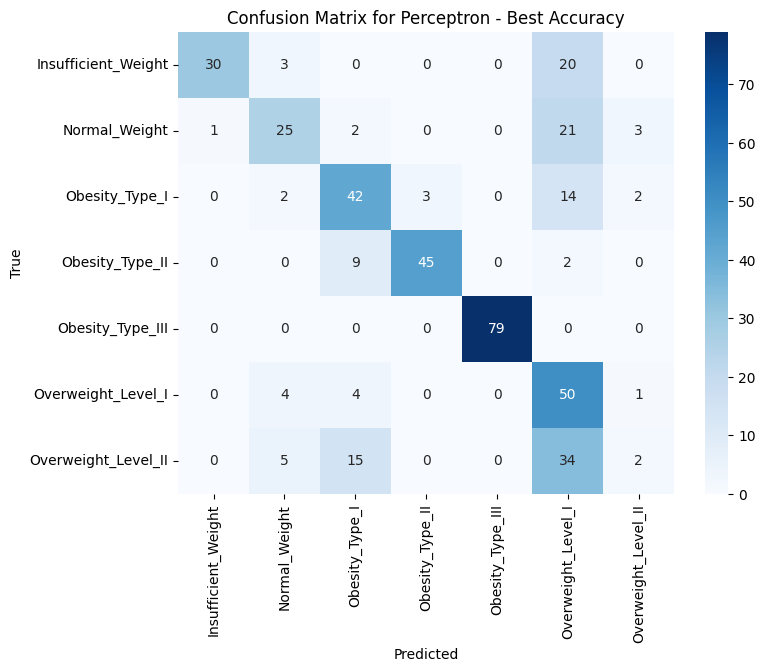


SVM:
  Best Accuracy: 0.73% using With Hyperparameter Tuning
  Best Hyperparameters: {'classifier__C': 0.1}
  Confusion Matrix:
[[50  0  0  0  0  3  0]
 [15 21  5  0  0  5  6]
 [ 0  3 48  7  1  2  2]
 [ 0  0  0 56  0  0  0]
 [ 0  0  0  0 79  0  0]
 [ 0  8  8  0  0 42  1]
 [ 0  2 32  5  0  8  9]]


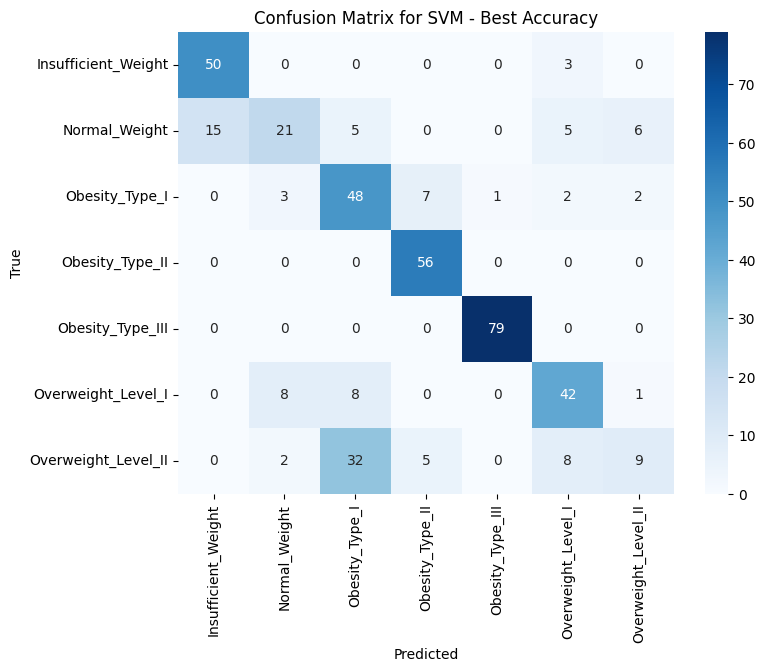


Decision Tree:
  Best Accuracy: 0.94% using Without Hyperparameter Tuning
  Best Hyperparameters: {'classifier__max_depth': None}
  Confusion Matrix:
[[39  1  0  0  0  0  0]
 [ 5 54  0  0  0  5  0]
 [ 0  0 70  0  0  0  5]
 [ 0  0  1 63  1  0  0]
 [ 0  0  0  0 59  0  0]
 [ 0  3  0  0  0 51  2]
 [ 0  0  0  0  0  0 58]]


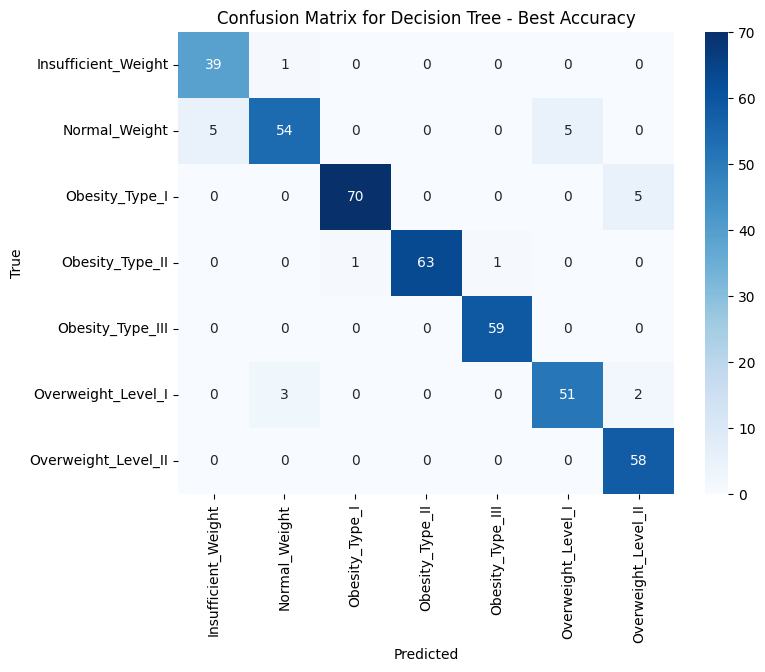


SGD:
  Best Accuracy: 0.74% using Without Hyperparameter Tuning
  Best Hyperparameters: {'classifier__alpha': 0.001}
  Confusion Matrix:
[[58  5  0  0  0  0  0]
 [ 1 45  4  0  0  4  7]
 [ 0  1 43  2  0 14  4]
 [ 0  0  1 54  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0 14  4  0  0 20  4]
 [ 0 17 15  0  0 10 28]]


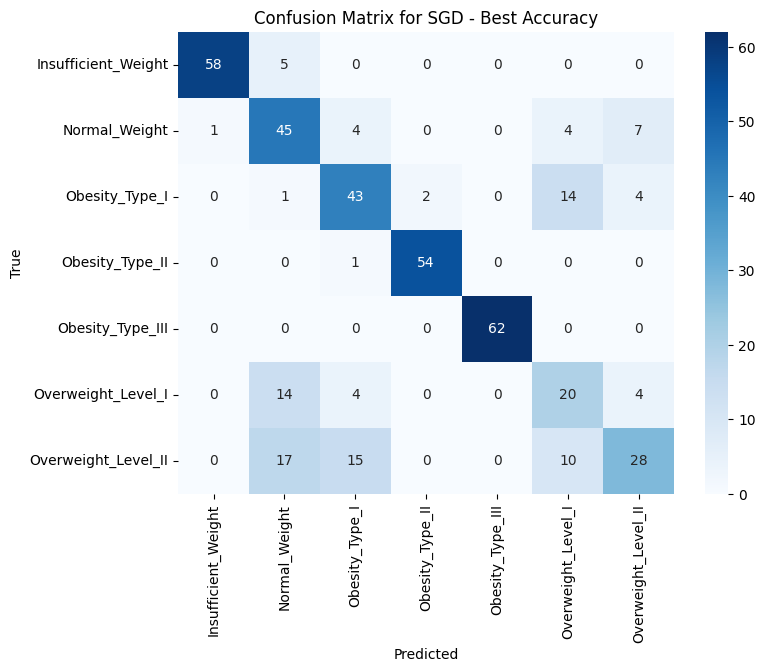

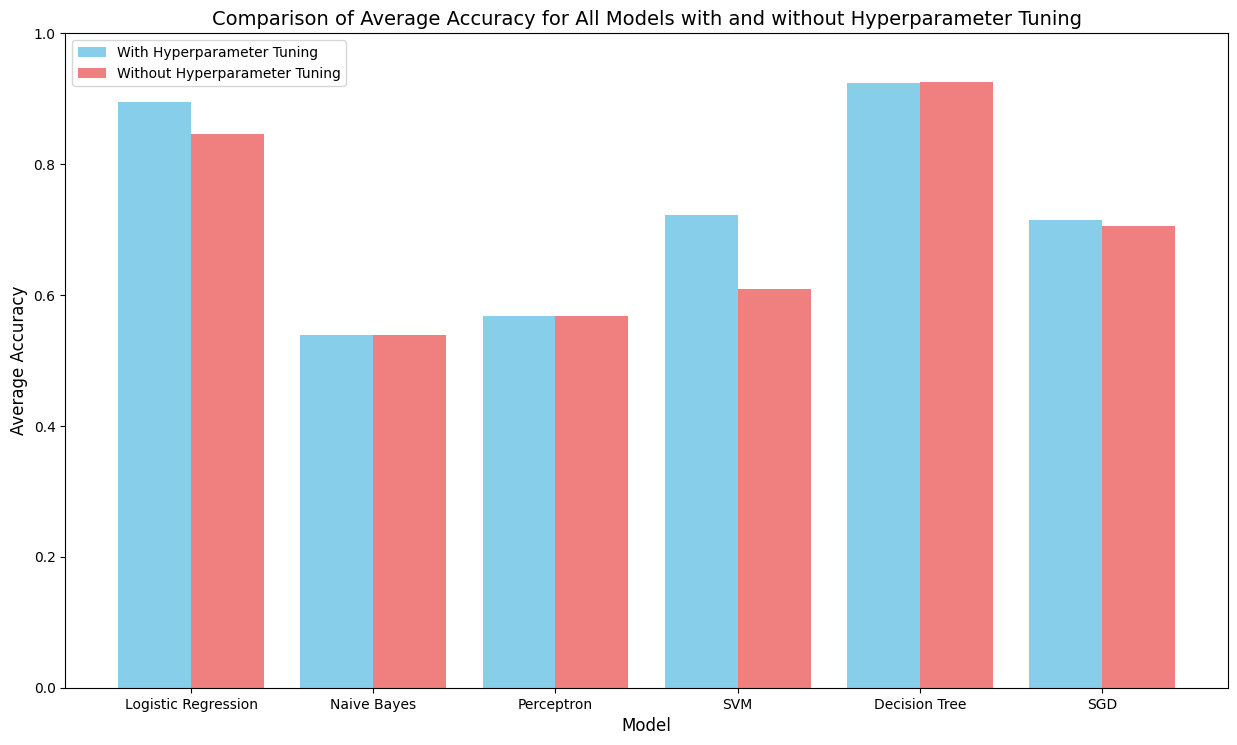


Results:
-------------------------------------------------------------

Logistic Regression:
  Average Accuracy with Hyperparameter Tuning: 89.51%
  Average Accuracy without Hyperparameter Tuning: 84.67%
  Best Hyperparameters: {'classifier__C': 1000}

Naive Bayes:
  Average Accuracy with Hyperparameter Tuning: 53.90%
  Average Accuracy without Hyperparameter Tuning: 53.90%
  Best Hyperparameters: {}

Perceptron:
  Average Accuracy with Hyperparameter Tuning: 56.82%
  Average Accuracy without Hyperparameter Tuning: 56.82%
  Best Hyperparameters: {}

SVM:
  Average Accuracy with Hyperparameter Tuning: 72.16%
  Average Accuracy without Hyperparameter Tuning: 60.86%
  Best Hyperparameters: {'classifier__C': 0.1}

Decision Tree:
  Average Accuracy with Hyperparameter Tuning: 92.43%
  Average Accuracy without Hyperparameter Tuning: 92.62%
  Best Hyperparameters: {'classifier__max_depth': None}

SGD:
  Average Accuracy with Hyperparameter Tuning: 71.54%
  Average Accuracy without Hyperparam

In [18]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to perform k-fold cross-validation and return data for each fold


def perform_kfold(X1, Y1, k1):
    kfold = KFold(k1, random_state=None, shuffle=True)
    folds = []
    for train_index, test_index in kfold.split(X1):
        X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
        Y_train, Y_test = Y1.iloc[train_index], Y1.iloc[test_index]
        folds.append([X_train, X_test, Y_train, Y_test])
    return folds

# Function to train and evaluate a model on a given fold and return confusion matrix
def train_and_evaluate_model_confusion_matrix(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)
    return accuracy, cm

# List of classification models with pipelines
models = {
    'Logistic Regression': Pipeline([
        ('classifier', linear_model.LogisticRegression(solver='saga', max_iter=100))
    ]),
    'Naive Bayes': Pipeline([
        ('classifier', GaussianNB())
    ]),
    'Perceptron': Pipeline([
        ('classifier', linear_model.Perceptron())
    ]),
    'SVM': Pipeline([
        ('classifier', LinearSVC(max_iter=10))
    ]),
    'Decision Tree': Pipeline([
        ('classifier', DecisionTreeClassifier(random_state=0))
    ]),
    'SGD': Pipeline([
        ('classifier', SGDClassifier(loss="hinge", max_iter=50))
    ])
}

# Hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {'classifier__C': [0.0001, 0.01, 0.1, 1, 10, 100,1000, 10000]},
    'Naive Bayes': {},  # No hyperparameters to tune for Naive Bayes
    'Perceptron': {},  # No hyperparameters to tune for Perceptron
    'SVM': {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 10000]},
    'Decision Tree': {'classifier__max_depth': [None,0.01, 0.1, 1, 10, 20, 30, 40, 100]},
    'SGD': {'classifier__alpha': [0.000001, 0.001, 0.01, 0.1, 1, 10]}
}

# Number of folds for cross-validation
k = 5
 # Assuming X is defined earlier

# Perform k-fold cross-validation
folds = perform_kfold(X_input, Y, k)

# Lists to store accuracies and best hyperparameters for each model
accuracies_with_hp = {model_name: [] for model_name in models}
accuracies_without_hp = {model_name: [] for model_name in models}
best_params = {model_name: [] for model_name in models}

# Train and evaluate each model on each fold with hyperparameter tuning
best_accuracy_models = {model_name: {'accuracy': 0, 'method': 'None', 'confusion_matrix': None} for model_name in models}

for model_name, model_pipeline in models.items():
    param_grid = param_grids.get(model_name, {})  # Get hyperparameter grid for the model
    grid_search = GridSearchCV(model_pipeline, param_grid, cv=k, scoring='accuracy', n_jobs=-1)

    for fold_data in folds:
        grid_search.fit(fold_data[0], fold_data[2])
        accuracy, cm = train_and_evaluate_model_confusion_matrix(grid_search, *fold_data[0:4])
        accuracies_with_hp[model_name].append(accuracy)
        best_params[model_name].append(grid_search.best_params_)

        # Update best accuracy models
        if accuracy > best_accuracy_models[model_name]['accuracy']:
            best_accuracy_models[model_name]['accuracy'] = accuracy
            best_accuracy_models[model_name]['method'] = 'With Hyperparameter Tuning'
            best_accuracy_models[model_name]['confusion_matrix'] = cm

# Train and evaluate each model on each fold without hyperparameter tuning
for model_name, model_pipeline in models.items():
    for fold_data in folds:
        accuracy, cm = train_and_evaluate_model_confusion_matrix(model_pipeline, *fold_data[0:4])
        accuracies_without_hp[model_name].append(accuracy)

        # Update best accuracy models
        if accuracy > best_accuracy_models[model_name]['accuracy']:
            best_accuracy_models[model_name]['accuracy'] = accuracy
            best_accuracy_models[model_name]['method'] = 'Without Hyperparameter Tuning'
            best_accuracy_models[model_name]['confusion_matrix'] = cm

# Bar plots for each model's accuracy with and without hyperparameter tuning
for model_name, model_accuracies_with_hp in accuracies_with_hp.items():
    model_accuracies_without_hp = accuracies_without_hp[model_name]
    best_param = best_params[model_name][0]

    # Plot with hyperparameter tuning
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(len(folds)) - 0.2, model_accuracies_with_hp, width=0.4, label='With Hyperparameter Tuning', color='skyblue', align='center')

    # Plot without hyperparameter tuning
    plt.bar(np.arange(len(folds)) + 0.2, model_accuracies_without_hp, width=0.4, label='Without Hyperparameter Tuning', color='lightcoral', align='center')

    plt.xlabel("Fold", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title(f"{model_name} - With and Without Hyperparameter Tuning", fontsize=14)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

# Print confusion matrix for the best accuracy
for model_name, details in best_accuracy_models.items():
    print(f"\n{model_name}:")
    print(f"  Best Accuracy: {details['accuracy']:.2f}% using {details['method']}")
    print(f"  Best Hyperparameters: {best_params[model_name][0]}")
    print(f"  Confusion Matrix:")
    print(details['confusion_matrix'])

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(details['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_,yticklabels=label_encoder.classes_)
    #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_,yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {model_name} - Best Accuracy")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Comparison plot for all methods with and without hyperparameter tuning
plt.figure(figsize=(15, 8.5))
average_accuracies_with_hp = [np.mean(accuracies_with_hp[model_name]) for model_name in models]
average_accuracies_without_hp = [np.mean(accuracies_without_hp[model_name]) for model_name in models]

plt.bar(np.arange(len(models)) - 0.2, average_accuracies_with_hp, width=0.4, label='With Hyperparameter Tuning', color='skyblue', align='center')
plt.bar(np.arange(len(models)) + 0.2, average_accuracies_without_hp, width=0.4, label='Without Hyperparameter Tuning', color='lightcoral', align='center')

plt.xlabel("Model", fontsize=12)
plt.ylabel("Average Accuracy", fontsize=12)
plt.title("Comparison of Average Accuracy for All Models with and without Hyperparameter Tuning", fontsize=14)
plt.xticks(np.arange(len(models)), list(models.keys()))
plt.ylim(0, 1)
plt.legend()
plt.show()

# Display accuracy and best hyperparameters of each model at the end
print("\nResults:")
print("-------------------------------------------------------------")
for model_name in models.keys():
    avg_accuracy_with_hp = np.mean(accuracies_with_hp[model_name]) * 100
    avg_accuracy_without_hp = np.mean(accuracies_without_hp[model_name]) * 100
    print(f"\n{model_name}:")
    print(f"  Average Accuracy with Hyperparameter Tuning: {avg_accuracy_with_hp:.2f}%")
    print(f"  Average Accuracy without Hyperparameter Tuning: {avg_accuracy_without_hp:.2f}%")

    if best_params[model_name]:
        print(f"  Best Hyperparameters: {best_params[model_name][0]}")
    else:
        print(f"  Best Hyperparameters: No hyperparameters tuned.")
print("-------------------------------------------------------------")


I have achieved an accuracy of nearly 93% using supervised methods, specifically employing the Decision Tree method for prediction. However, the results obtained from unsupervised methods are less satisfactory. Suggestions to enhance the accuracy of the classification problem using ChatGPT 3.5 are as follows:

  1. Consider introducing additional features or engaging in feature engineering to improve the separability of clusters.

  2. Explore Alternative Clustering Algorithms: Experiment with clustering algorithms beyond MiniBatchKMeans and AgglomerativeClustering, such as DBSCAN or hierarchical clustering.

  3. Hyperparameter Tuning:If applicable, delve into the exploration and tuning of hyperparameters for clustering algorithms to optimize their performance.

  4. Explore Other Methods and Algorithms: Consider the utilization of alternative methods and algorithms, including deep learning approaches, to further enhance classification accuracy.

In [19]:
pip install keras


The following code builds and trains a neural network for multi-class classification, using regularization techniques and adaptive learning rates. It evaluates the model with accuracy, confusion matrix, ROC curve, and a detailed classification report, providing a comprehensive analysis of performance on the test set.


Epoch 1/100
42/42 [==============================] - 6s 50ms/step - loss: 1.9911 - accuracy: 0.3004 - val_loss: 1.8599 - val_accuracy: 0.3413 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 1s 26ms/step - loss: 1.3914 - accuracy: 0.4936 - val_loss: 1.5876 - val_accuracy: 0.6587 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 1s 15ms/step - loss: 1.1980 - accuracy: 0.5873 - val_loss: 1.3315 - val_accuracy: 0.6647 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 1s 19ms/step - loss: 1.0705 - accuracy: 0.6270 - val_loss: 1.1409 - val_accuracy: 0.7066 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 1s 17ms/step - loss: 0.9699 - accuracy: 0.6704 - val_loss: 0.9624 - val_accuracy: 0.7635 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 1s 20ms/step - loss: 0.9170 - accuracy: 0.6996 - val_loss: 0.8557 - val_accuracy: 0.8024 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 1s 18ms/step - lo

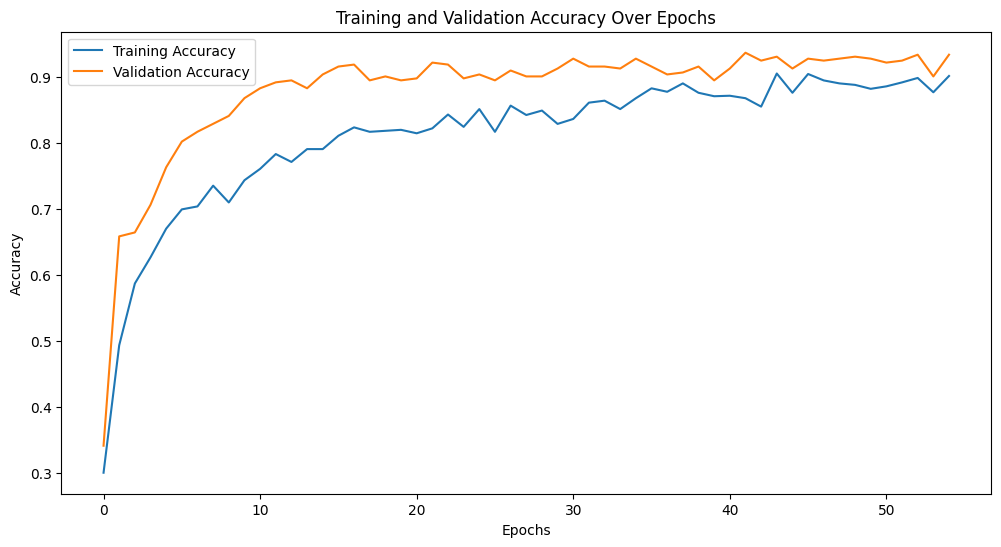

14/14 [==============================] - 0s 5ms/step


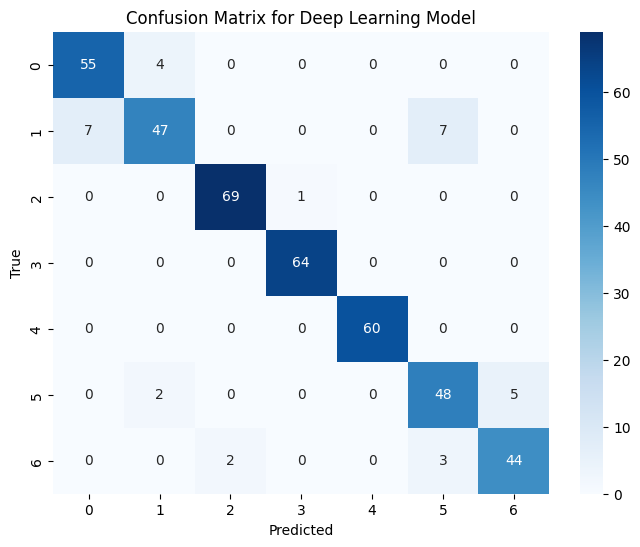

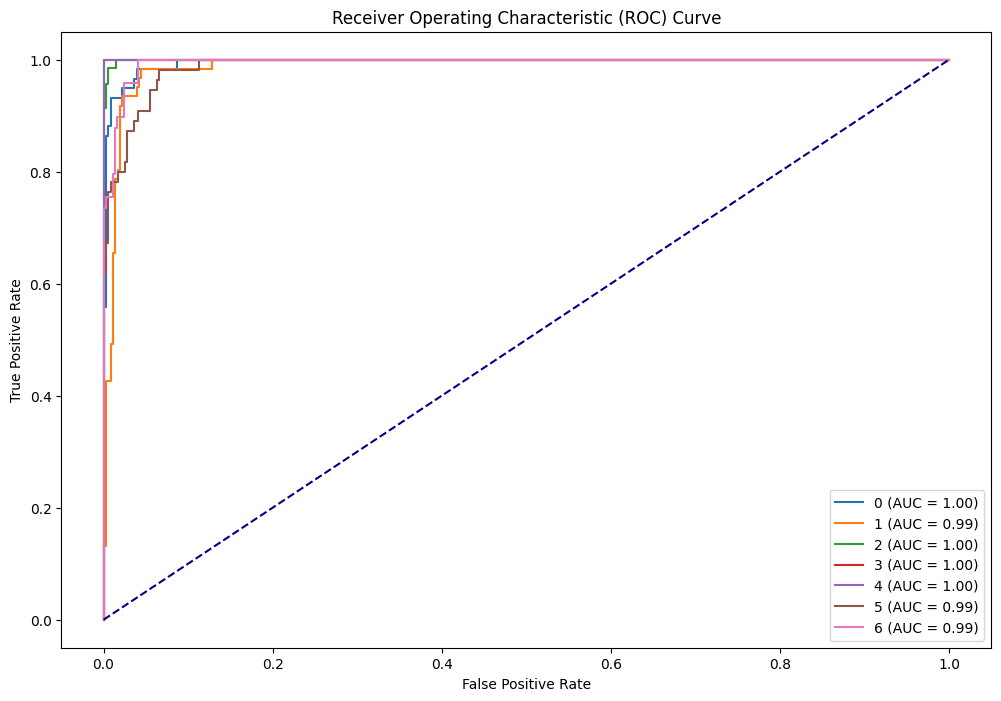

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        59
           1       0.89      0.77      0.82        61
           2       0.97      0.99      0.98        70
           3       0.98      1.00      0.99        64
           4       1.00      1.00      1.00        60
           5       0.83      0.87      0.85        55
           6       0.90      0.90      0.90        49

    accuracy                           0.93       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import numpy as np

# Encode labels into numerical values
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Convert labels to one-hot encoding
Y_encoded_onehot = to_categorical(Y_encoded)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded_onehot, test_size=0.2, random_state=42)

# Build a neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(7, activation='softmax'))

# Compile the model with Adam optimizer and a smaller learning rate
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.02), metrics=['accuracy'])

# Train the model with early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(
    X_train, Y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, Y_test)[1]
print(f"Accuracy of the deep learning model: {accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

# Get predicted probabilities for each class
Y_prob = model.predict(X_test)

# Predicted classes
Y_pred = np.argmax(Y_prob, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_,yticklabels=label_encoder.classes_)

plt.title("Confusion Matrix for Deep Learning Model")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
plt.figure(figsize=(12, 8))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(Y_test[:, i], Y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Print classification report
class_names = list(map(str, label_encoder.classes_))
print("Classification Report:")
print(classification_report(np.argmax(Y_test, axis=1), Y_pred, target_names=class_names))


**Neural Network Model:**


A sequential neural network model is built using Keras with three dense layers.
        Batch normalization is applied after each dense layer to improve training stability.
        Dropout layers are added to reduce overfitting.

Model Compilation:
        The model is compiled using the Adam optimizer with a specified learning rate.
        Categorical cross-entropy is used as the loss function, and accuracy is chosen as the metric.


Training with Early Stopping and Learning Rate Reduction:
        The model is trained using the training set.
        Early stopping is implemented to prevent overfitting, and learning rate reduction on plateau is used for adaptive learning rates.


Evaluation and Plotting:
        The code evaluates the model on the test set and prints the accuracy.
        It plots the training and validation accuracy over epochs, the confusion matrix, and the ROC curve.


Classification Report:
        The code generates a classification report, including precision, recall, and F1-score for each class.


Methods Used:

Neural Network:
        The neural network architecture consists of fully connected dense layers with ReLU activation functions.
        Batch normalization and dropout are used for regularization.


Optimization Algorithm:
        The Adam optimizer is employed for model optimization.


Regularization:
        L2 regularization is applied to the weights of the dense layers to prevent overfitting.



Callbacks:
        Early stopping is implemented to halt training when the validation loss plateaus.
        Learning rate reduction on plateau adjusts the learning rate dynamically during training.



Evaluation Metrics:
        Accuracy is used as the primary evaluation metric.
        Additional metrics such as the confusion matrix, ROC curve, and classification report provide insights into model performance.




**Results:**

Accuracy:
        The code reports the accuracy of the deep learning model on the test set.
        The training history plot shows the training and validation accuracy trends over epochs.


Confusion Matrix:
        A heatmap of the confusion matrix is plotted, visualizing the model's performance in predicting each class.



ROC Curve:
        The ROC curve is plotted to evaluate the trade-off between true positive rate and false positive rate for different thresholds.


Classification Report:
        The classification report provides detailed metrics for each class, including precision, recall, and F1-score.



**Potential Improvements (GPT 3.5):**

Hyperparameter Tuning:
        Further exploration of hyperparameters like batch size, dropout rates, and regularization strength may lead to better results.


Advanced Architectures:
        Consider experimenting with more complex architectures, such as convolutional neural networks (CNNs) or recurrent neural networks (RNNs), depending on the nature of the data.


Ensemble Methods:
        Implement ensemble methods by combining predictions from multiple models.


Data Augmentation:
        If the dataset is limited, applying data augmentation techniques during training could be beneficial.



**The project has been done by Mahdi Baniasadi.**

December_2023
